In [457]:
!pip install pycountry


<h2>Import all necessary modules </h2>

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import pycountry
import geopandas
import warnings
warnings.filterwarnings('ignore')

<h2>Import dataset<h2>

In [459]:
dataset="/content/main_suicides.csv"
df=pd.read_csv(dataset)
print(df)

          country  year     sex          age  suicides_no  population  \
0         Albania  1992    male  35-54 years           12      343800   
1         Albania  1992    male  15-24 years            9      263700   
2         Albania  1992    male  55-74 years            5      159500   
3         Albania  1992    male  25-34 years            7      245500   
4         Albania  1992  female  15-24 years            7      292400   
...           ...   ...     ...          ...          ...         ...   
24361  Uzbekistan  2014  female  35-54 years          107     3620833   
24362  Uzbekistan  2014  female    75+ years            9      348465   
24363  Uzbekistan  2014    male   5-14 years           60     2762158   
24364  Uzbekistan  2014  female   5-14 years           44     2631600   
24365  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   3.49     Albania1992      

<h1> data related information started like,</h1>
<h4>Column_name, data type, dropping columns, renaming column names etc</h4>

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             24366 non-null  object 
 1   year                24366 non-null  int64  
 2   sex                 24366 non-null  object 
 3   age                 24366 non-null  object 
 4   suicides_no         24366 non-null  int64  
 5   population          24366 non-null  int64  
 6   suicides/100k pop   24366 non-null  float64
 7   country-year        24366 non-null  object 
 8   HDI for year        24366 non-null  float64
 9    gdp_for_year ($)   24366 non-null  object 
 10  gdp_per_capita ($)  24366 non-null  int64  
 11  generation          24366 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.2+ MB


In [461]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [462]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [463]:
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1992    male  35-54 years           12      343800   
1  Albania  1992    male  15-24 years            9      263700   
2  Albania  1992    male  55-74 years            5      159500   
3  Albania  1992    male  25-34 years            7      245500   
4  Albania  1992  female  15-24 years            7      292400   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               3.49  Albania1992         0.614        709,452,584   
1               3.41  Albania1992         0.614        709,452,584   
2               3.13  Albania1992         0.614        709,452,584   
3               2.85  Albania1992         0.614        709,452,584   
4               2.39  Albania1992         0.614        709,452,584   

   gdp_per_capita ($)    generation  
0                 251       Boomers  
1                 251  Generation X  
2                 251        Silent  
3                 251       Boomers  
4                 251  Generation X

In [464]:
df.drop(['country-year'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             24366 non-null  object 
 1   year                24366 non-null  int64  
 2   sex                 24366 non-null  object 
 3   age                 24366 non-null  object 
 4   suicides_no         24366 non-null  int64  
 5   population          24366 non-null  int64  
 6   suicides/100k pop   24366 non-null  float64
 7   HDI for year        24366 non-null  float64
 8    gdp_for_year ($)   24366 non-null  object 
 9   gdp_per_capita ($)  24366 non-null  int64  
 10  generation          24366 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.0+ MB


In [465]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year"," gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"},inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')


In [466]:
print(df["gdp_for_year"])

0           709,452,584
1           709,452,584
2           709,452,584
3           709,452,584
4           709,452,584
              ...      
24361    63,067,077,179
24362    63,067,077,179
24363    63,067,077,179
24364    63,067,077,179
24365    63,067,077,179
Name: gdp_for_year, Length: 24366, dtype: object


In [467]:
df['year']

0        1992
1        1992
2        1992
3        1992
4        1992
         ... 
24361    2014
24362    2014
24363    2014
24364    2014
24365    2014
Name: year, Length: 24366, dtype: int64

<h1> data related information end</h1>

<h1> barploting, lineploting are started of one feature against another feature</h1>
<h4>To see how the features are related</h4>

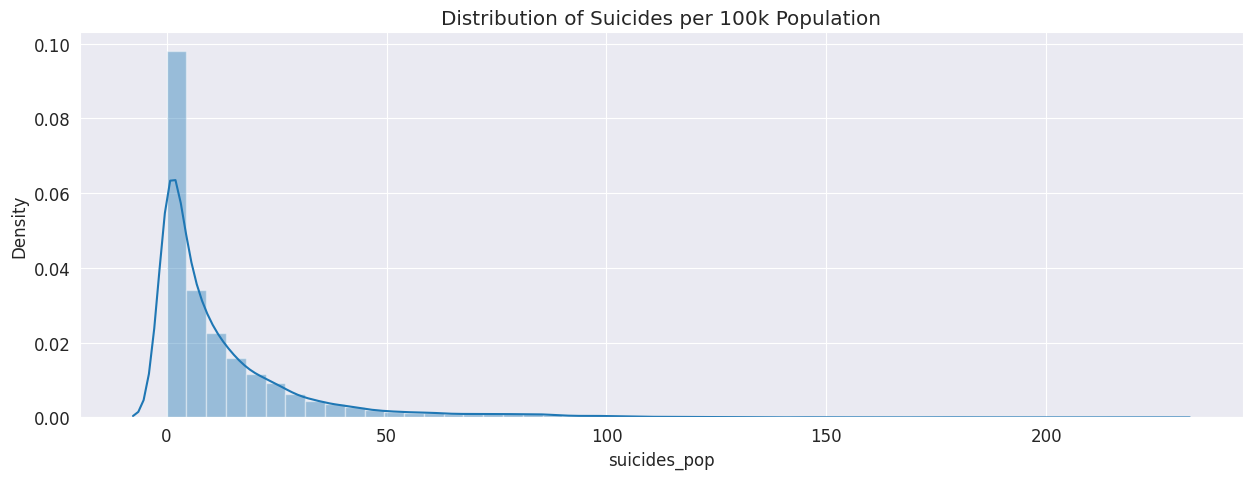

In [468]:
plt.figure(figsize=(15,5))
sns.distplot(df['suicides_pop'],hist=True)
plt.title('Distribution of Suicides per 100k Population')
plt.show()

<h5>As we can see the target variable(suicide/100k population) is not normally distributed. Hence we will have to normalize the distribution before using a linear model on it. <h5>

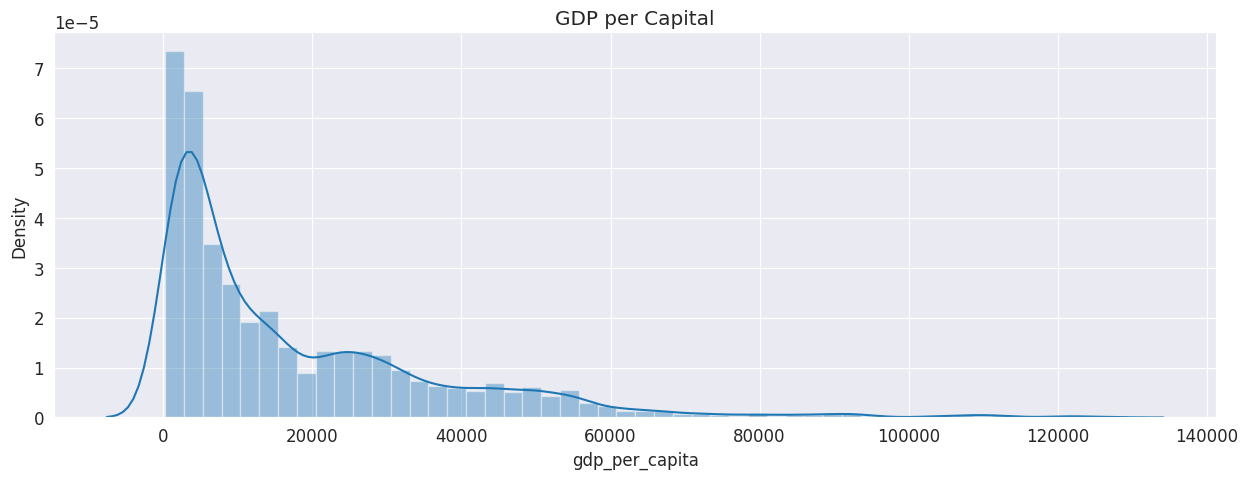

In [469]:
plt.figure(figsize=(15,5))
sns.distplot(df['gdp_per_capita'],hist=True)
plt.title('GDP per Capital')
plt.show()

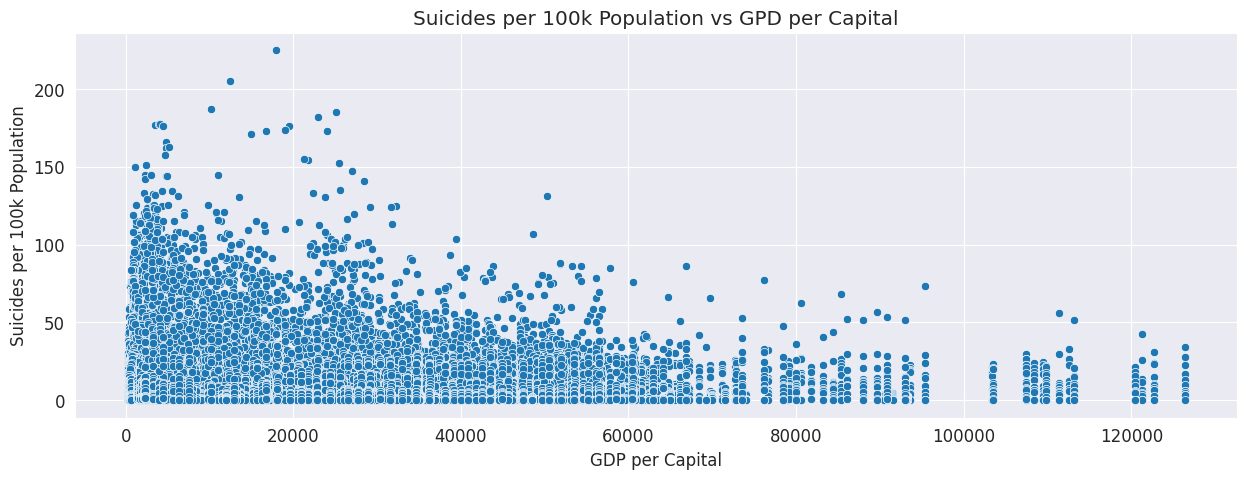

In [470]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['gdp_per_capita'],y=df['suicides_pop'])
plt.title('Suicides per 100k Population vs GPD per Capital')
plt.xlabel('GDP per Capital')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>We see that the countries with gdp per capital is more than 100000 have the minimum suicide rate for per 100k people.</h5>

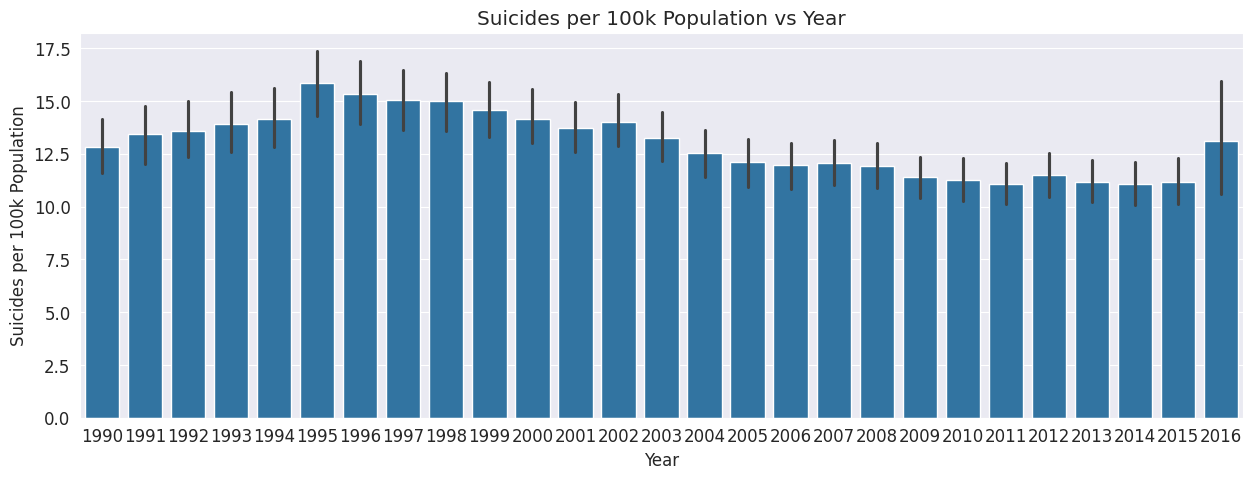

In [471]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['year'],y=df['suicides_pop'])
plt.title('Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()


<h5>in 1995, the suicide rate is topmost for per 100k population.</h5>

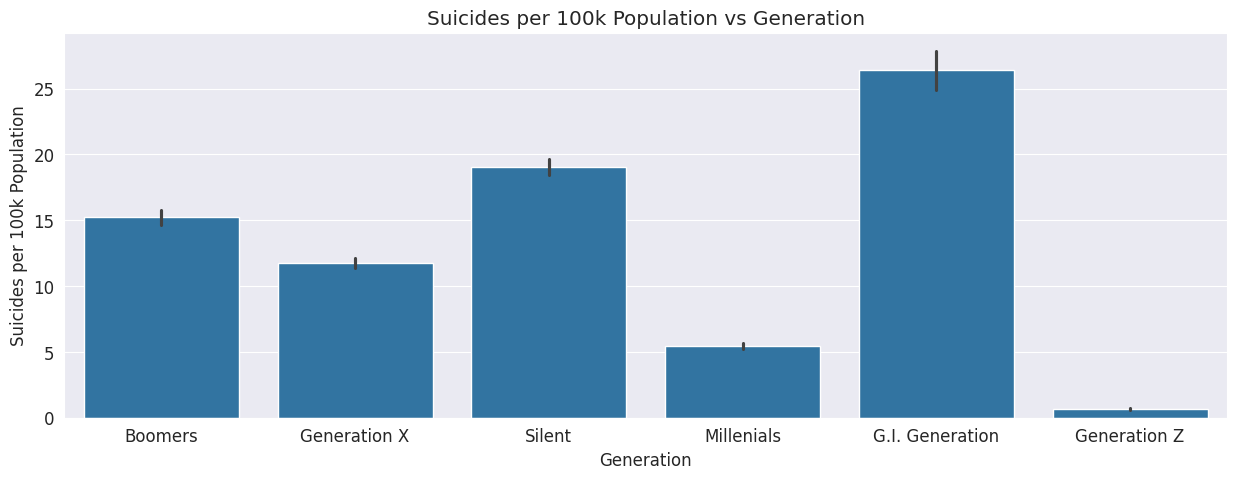

In [472]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['generation'],y=df['suicides_pop'])
plt.title('Suicides per 100k Population vs Generation')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>G.I. generation has the highest suicide ratio</h5>

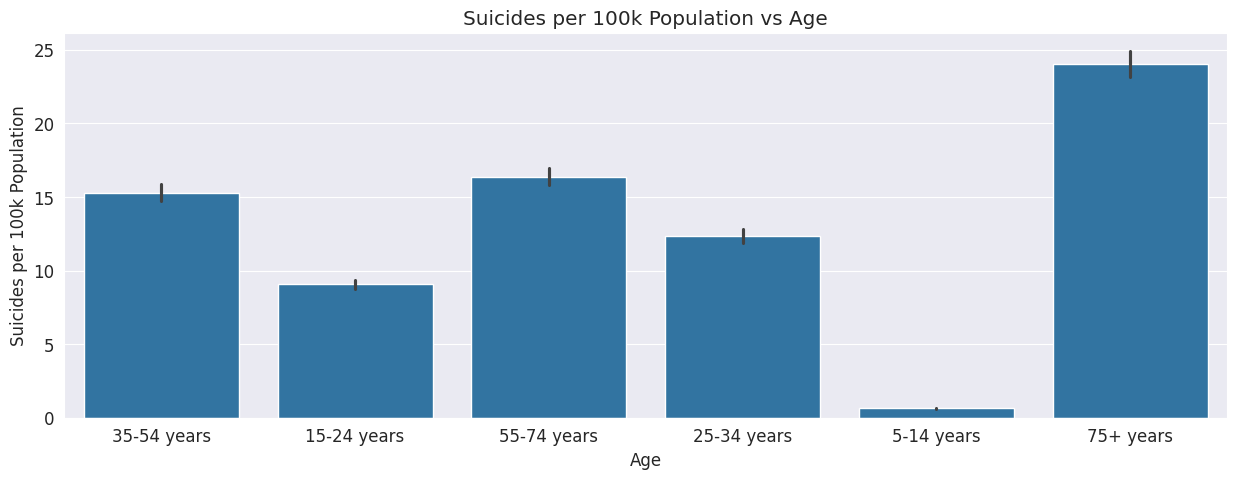

In [473]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['age'],y=df['suicides_pop'])
plt.title('Suicides per 100k Population vs Age')
plt.xlabel('Age')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>from age category "75+ years" has the highest suicide rate</h5>

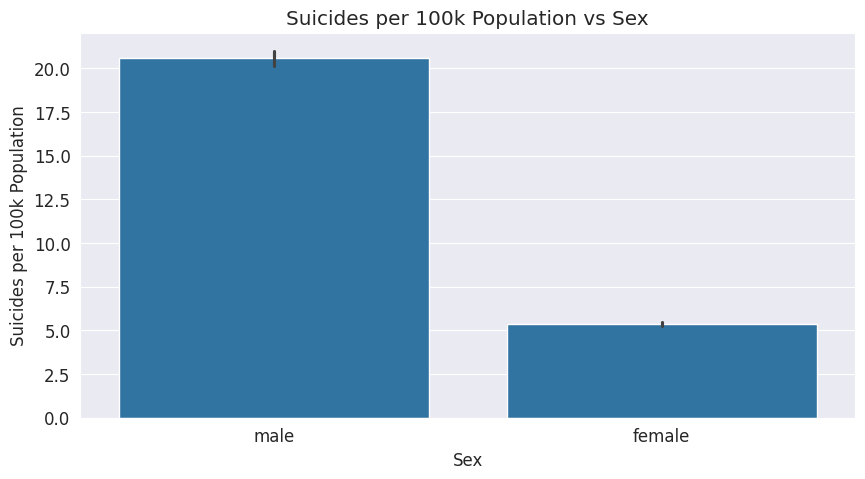

In [474]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['sex'],y=df['suicides_pop'])
plt.title('Suicides per 100k Population vs Sex')
plt.xlabel('Sex')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>the suicide rate of male is 3 times more than female</h5>

In [475]:
GIgen = df[df.generation == 'G.I. Generation']
Sgen = df[df.generation == 'Silent']
Boomer = df[df.generation == 'Boomers']
genx = df[df.generation == 'Generation X']
Milen = df[df.generation == 'Millenials']
genz = df[df.generation == 'Generation Z']

In [476]:
df['year']

0        1992
1        1992
2        1992
3        1992
4        1992
         ... 
24361    2014
24362    2014
24363    2014
24364    2014
24365    2014
Name: year, Length: 24366, dtype: int64

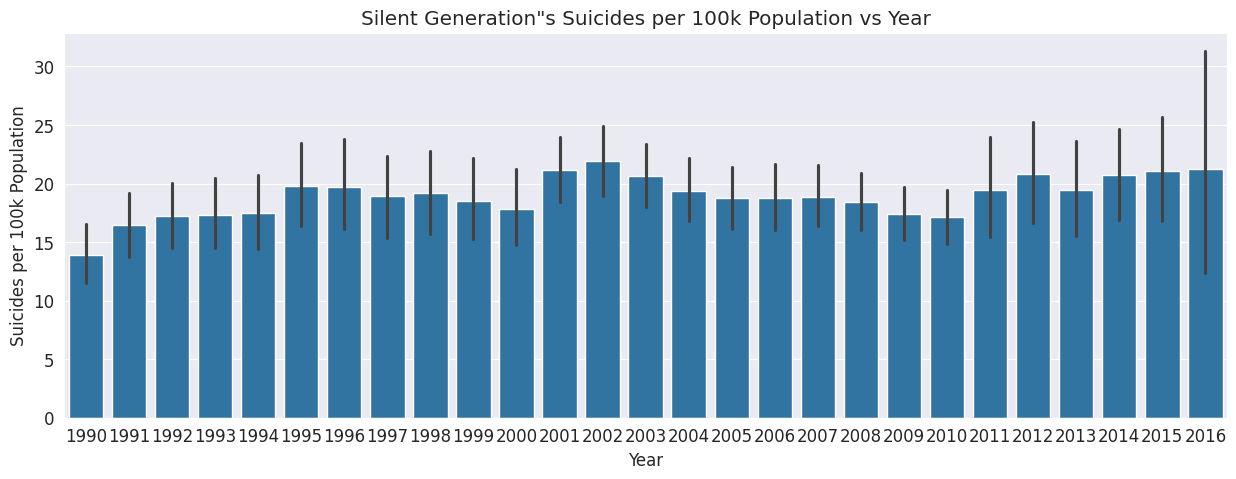

In [477]:
plt.figure(figsize=(15,5))
sns.barplot(x=Sgen.year,y=Sgen['suicides_pop'])
plt.title('Silent Generation"s Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>for silent generation suicides ratio is high in 2002,2015 and 2016 respectively</h5>

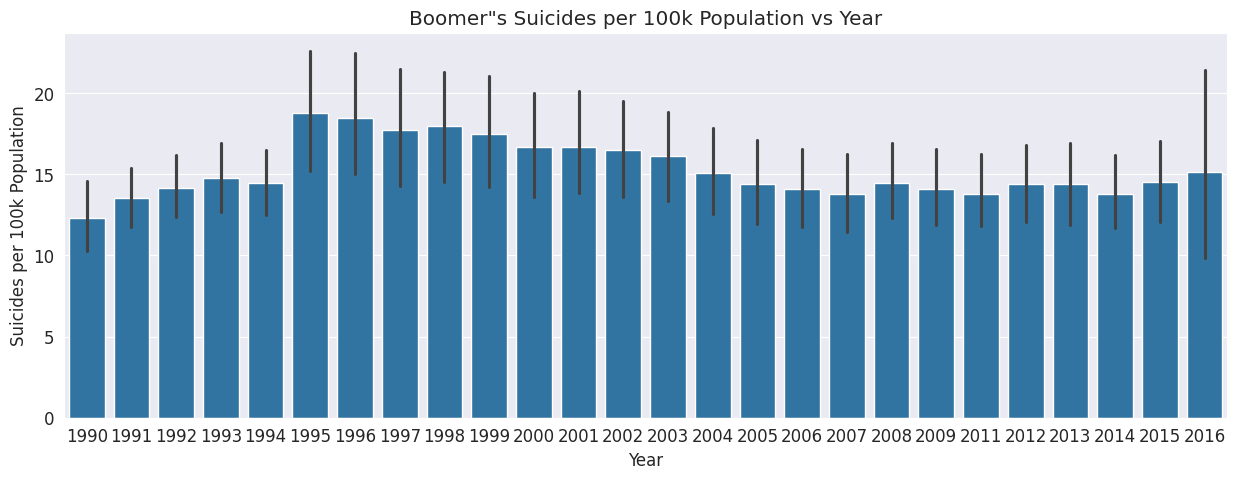

In [478]:
plt.figure(figsize=(15,5))
sns.barplot(x=Boomer.year,y=Boomer['suicides_pop'])
plt.title('Boomer"s Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>for Boomer generation suicides ratio is high in 1995</h5>

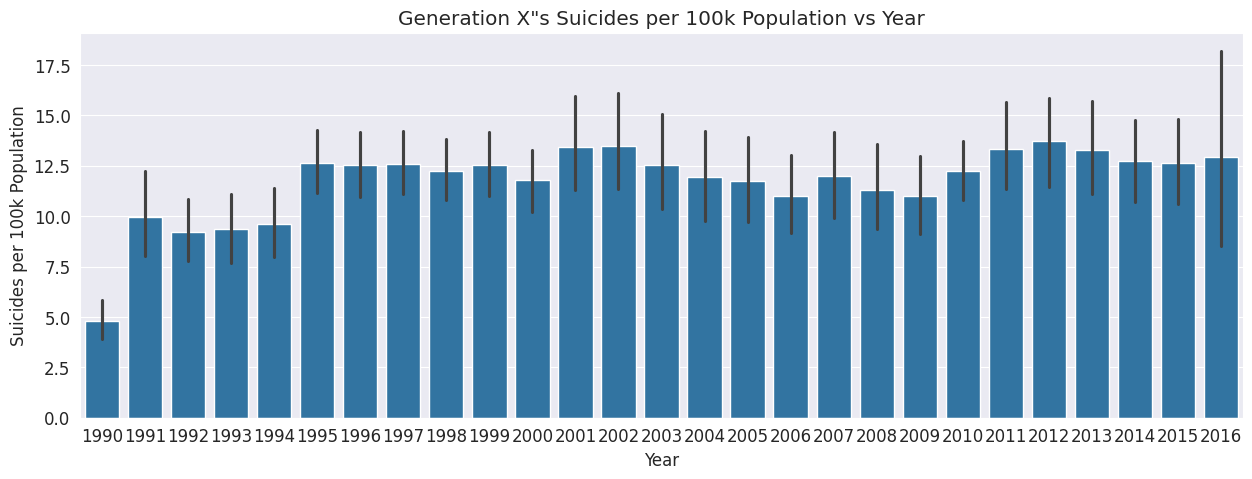

In [479]:
plt.figure(figsize=(15,5))
sns.barplot(x=genx.year,y=genx['suicides_pop'])
plt.title('Generation X"s Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>for generation X, suicides ratio is high in 2002 and 2012 respectively</h5>

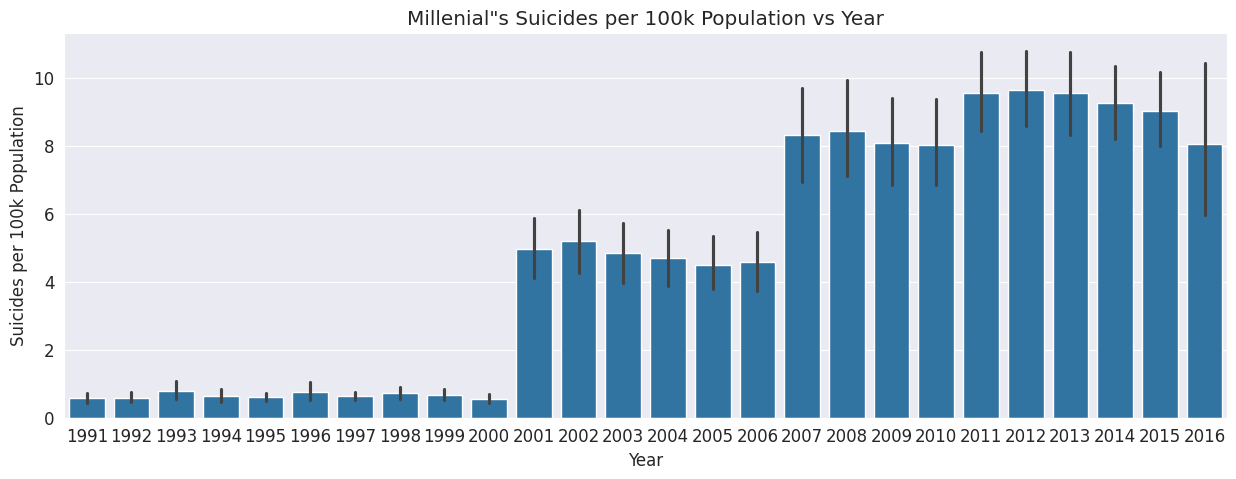

In [480]:
plt.figure(figsize=(15,5))
sns.barplot(x=Milen.year,y=Milen['suicides_pop'])
plt.title('Millenial"s Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>for Millenial generation suicides ratio is high in 2011,2012 and 2013 respectively</h5>

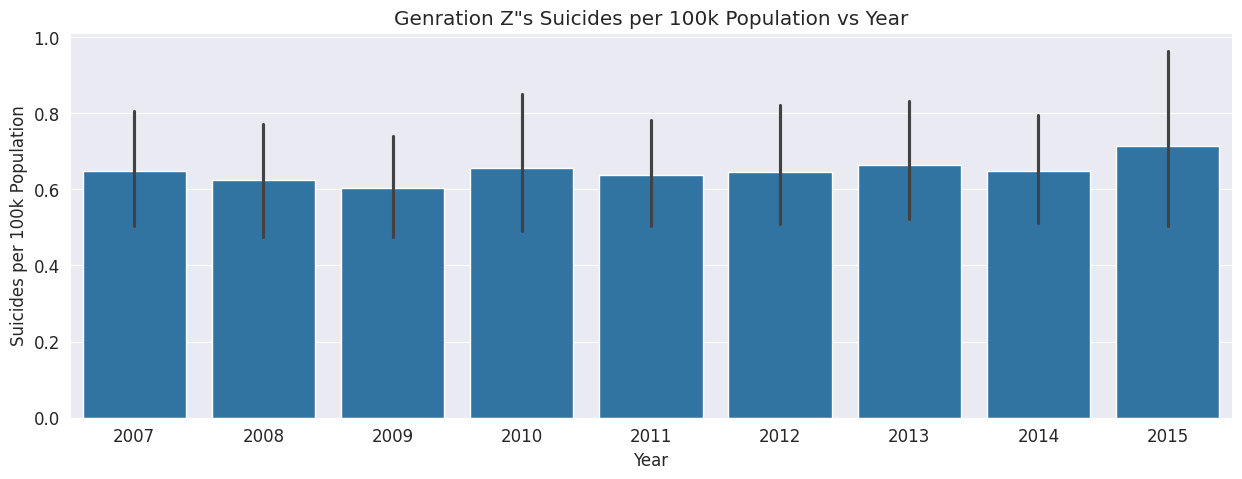

In [481]:
plt.figure(figsize=(15,5))
sns.barplot(x=genz.year,y=genz['suicides_pop'])
plt.title('Genration Z"s Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

<h5>for generation Z, suicides ratio is high in 2015</h5>

In [482]:
df["gdp_for_year"]=df["gdp_for_year"].str.replace(",","")

In [483]:
df["gdp_for_year"].astype(np.int64)


0          709452584
1          709452584
2          709452584
3          709452584
4          709452584
            ...     
24361    63067077179
24362    63067077179
24363    63067077179
24364    63067077179
24365    63067077179
Name: gdp_for_year, Length: 24366, dtype: int64

In [484]:
df['age']=df['age'].str.replace('5-14 years','05-14 years')

0        1992
1        1992
2        1992
3        1992
10       1992
         ... 
24355    2014
24357    2014
24358    2014
24359    2014
24363    2014
Name: year, Length: 12183, dtype: int64
0         12
1          9
2          5
3          7
4          7
        ... 
24361    107
24362      9
24363     60
24364     44
24365     21
Name: suicides_no, Length: 24366, dtype: int64


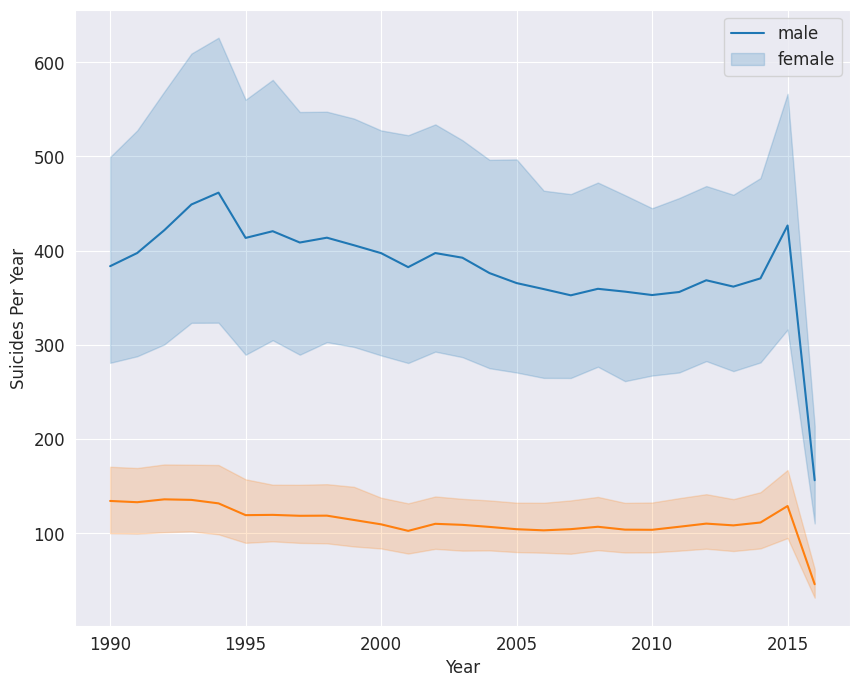

In [485]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
print(df_men.year)
# print(df['df.suicides_no'].dtypes)
print(df.suicides_no)
data_plot_M=pd.DataFrame({"Year":df_men.year,"Suicides Per Year":df.suicides_no})
data_plot_F=pd.DataFrame({"Year":df_women.year,"Suicides Per Year":df.suicides_no})
# sns.lineplot(df_men.year,df.suicides_no, ci=None)
# sns.lineplot(df_women.year,df.suicides_no,ci=None)
sns.lineplot(x="Year",y="Suicides Per Year", data=data_plot_M)
sns.lineplot(x="Year",y="Suicides Per Year", data=data_plot_F)
plt.legend(["male","female"])
plt.show()

<h5>In line ploting also we see the same resul as we declared before that the suicide ratio of male is 3 times more than female</h5>

                  suicides_no  population
year age                                 
1990 05-14 years         1468   263400989
     15-24 years        23126   260870481
     25-34 years        35119   254762294
     35-54 years        65031   380108836
     55-74 years        46897   234692643
...                       ...         ...
2016 15-24 years         1092    19796682
     25-34 years         1928    22058807
     35-54 years         5624    46533316
     55-74 years         4685    31822857
     75+ years           1851     9722645

[161 rows x 2 columns]


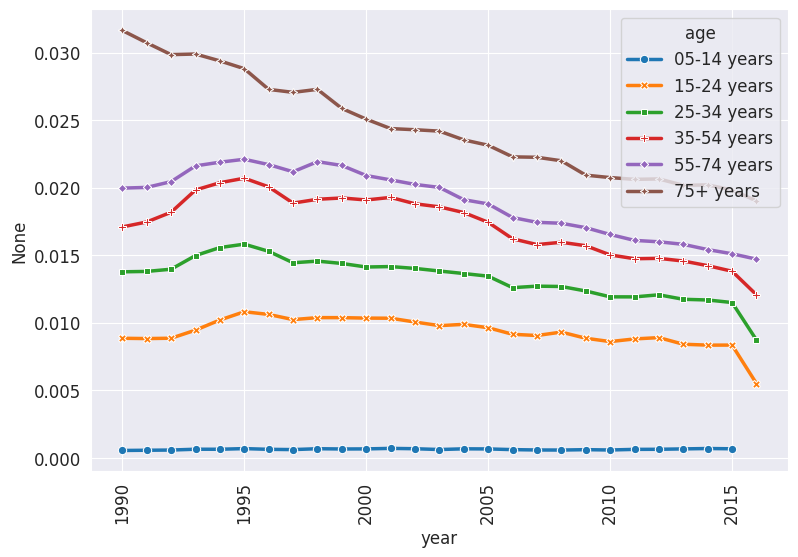

In [486]:
df_age = df.groupby(["year","age"])[["suicides_no", "population"]].sum()
print(df_age)

df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_reset.suicides_no*100/df_reset.population, hue="age",
             data=df_reset, linewidth=2.5, style="age", markers=True, dashes=False)
plt.xticks(rotation=90)
plt.show()

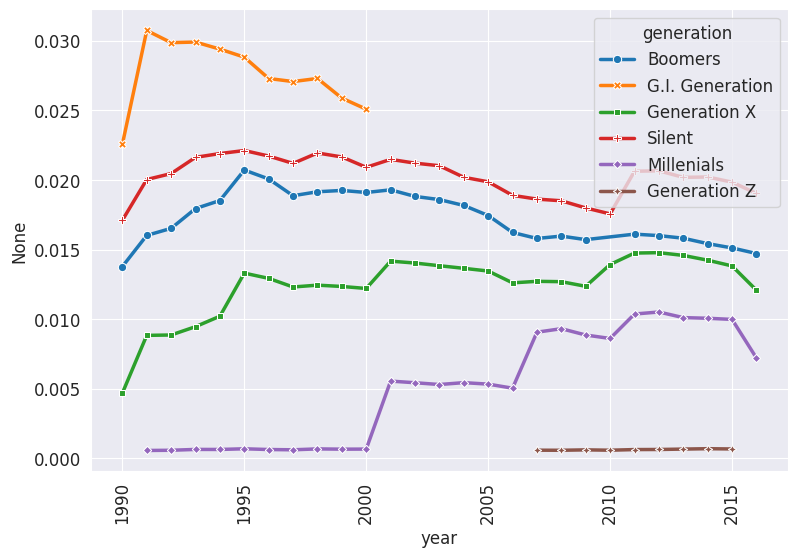

In [487]:
df_generation = df.groupby(["year", "generation"])[["suicides_no", "population"]].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x="year", y=df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation",
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

In [488]:
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

97

In [489]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

<h5>Country Iso name storing</h5>

In [490]:
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Republic of Korea',
 'Saint Vincent and Grenadines',
 'Turkey']

In [491]:
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace('Czech Republic', "Czechia", inplace = True)
df.replace('Macau', 'Macao', inplace = True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

In [492]:
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
         1999    0.004588
         2000    0.001931
         2001    0.004251
dtype: float64

In [493]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

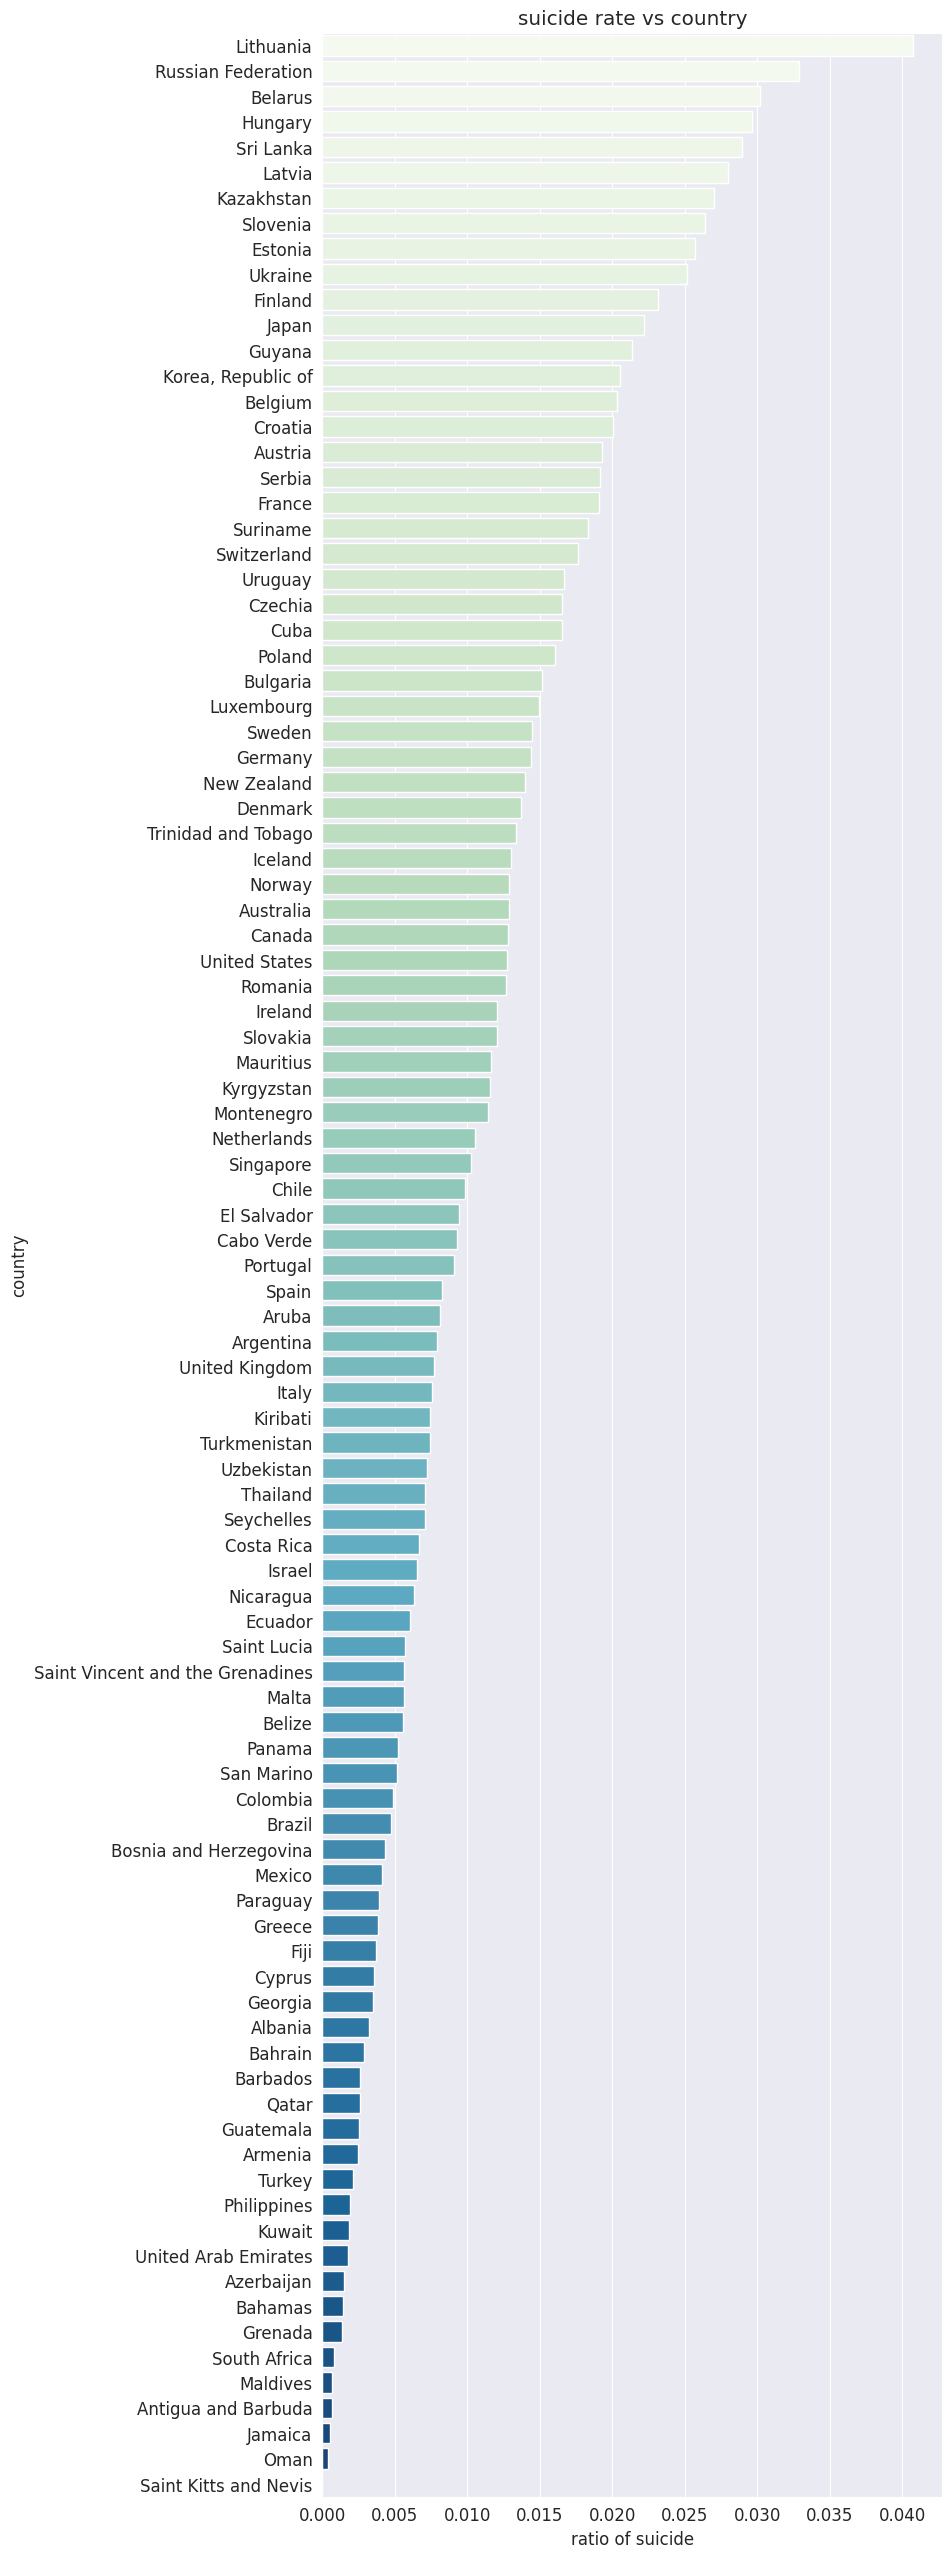

In [494]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

<h5>Countrywise suicidal ratio</h5>

In [495]:
country_dict = dict()
for idx in range(len(country_list)):
    country = country_list[idx]
    if country in countries:  # Check if the country exists in the countries dictionary
        country_dict[countries[country]] = country_suicide[idx]
    else:
        print(f"Country '{country}' not found in countries dictionary.")
country_dict = dict()
for idx in range(len(country_list)):
    country = country_list[idx]
    country_code = countries.get(country)  # Safely get the value, or None if key doesn't exist
    if country_code is not None:
        country_dict[country_code] = country_suicide[idx]
    else:
        print(f"Country '{country}' not found in countries dictionary.")


Country 'Turkey' not found in countries dictionary.
Country 'Turkey' not found in countries dictionary.


In [496]:
new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)
new_country_df.head()

iso_a3  suicide_rate
0    LTU      0.040736
1    RUS      0.032884
2    BLR      0.030231
3    HUN      0.029617
4    LKA      0.028946

<h5>suicidal ratio with each countries iso name</h5>

<h5>worldwide suicide rate in map. hence in Asia, the suicide rate is high</h5>

<h5> yearly the top most suicide ratio countrys suicide ratio showin</h5>

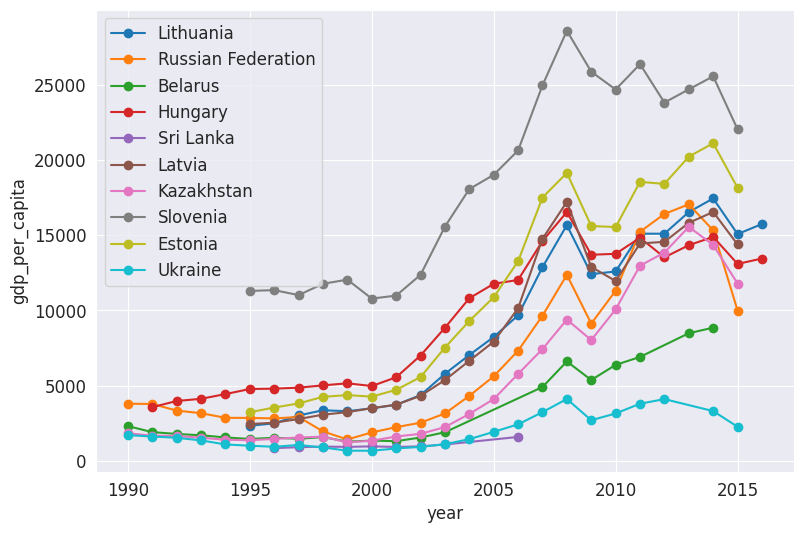

In [497]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

<h5> yearly the top most suicide ratio countrys GDP per capital showing</h5>

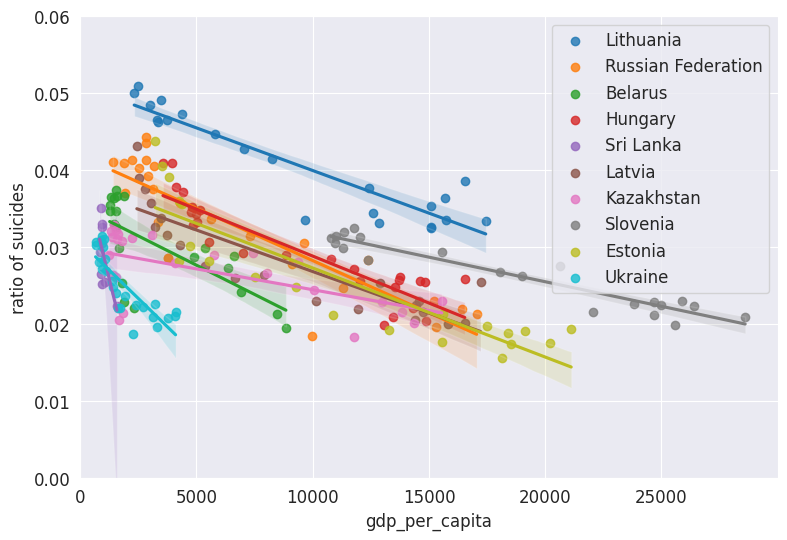

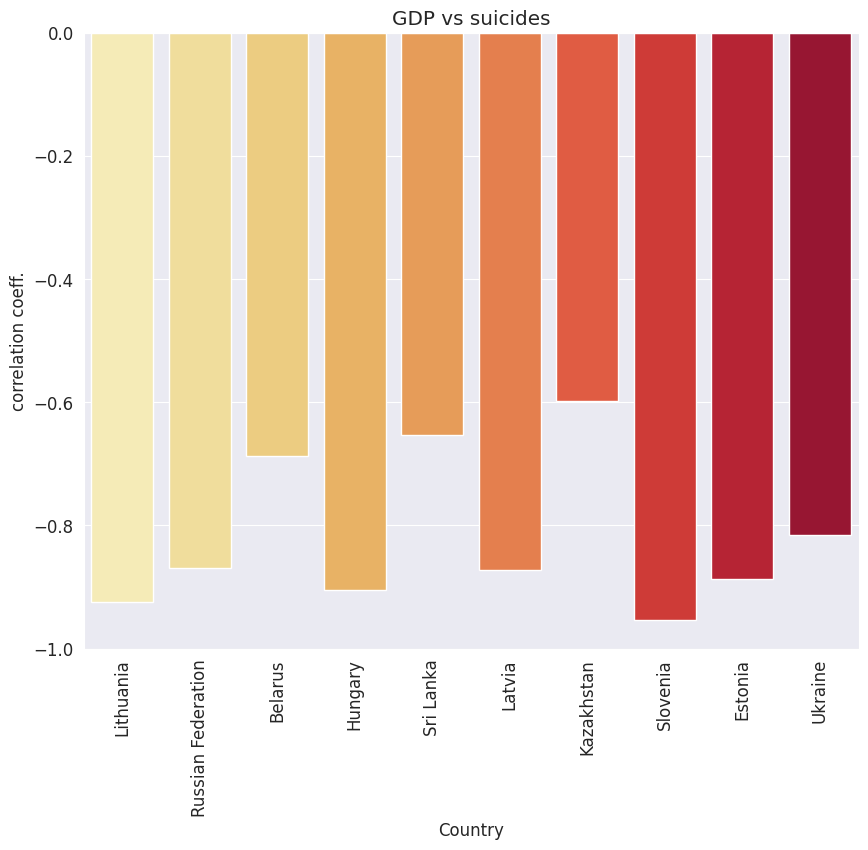

In [498]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)

sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

<h5> yearly the top most suicide ratio countrys regression line between GDP per Capital and suicide ratio also in another plot, showing correlation coefficiency of those countries </h5>

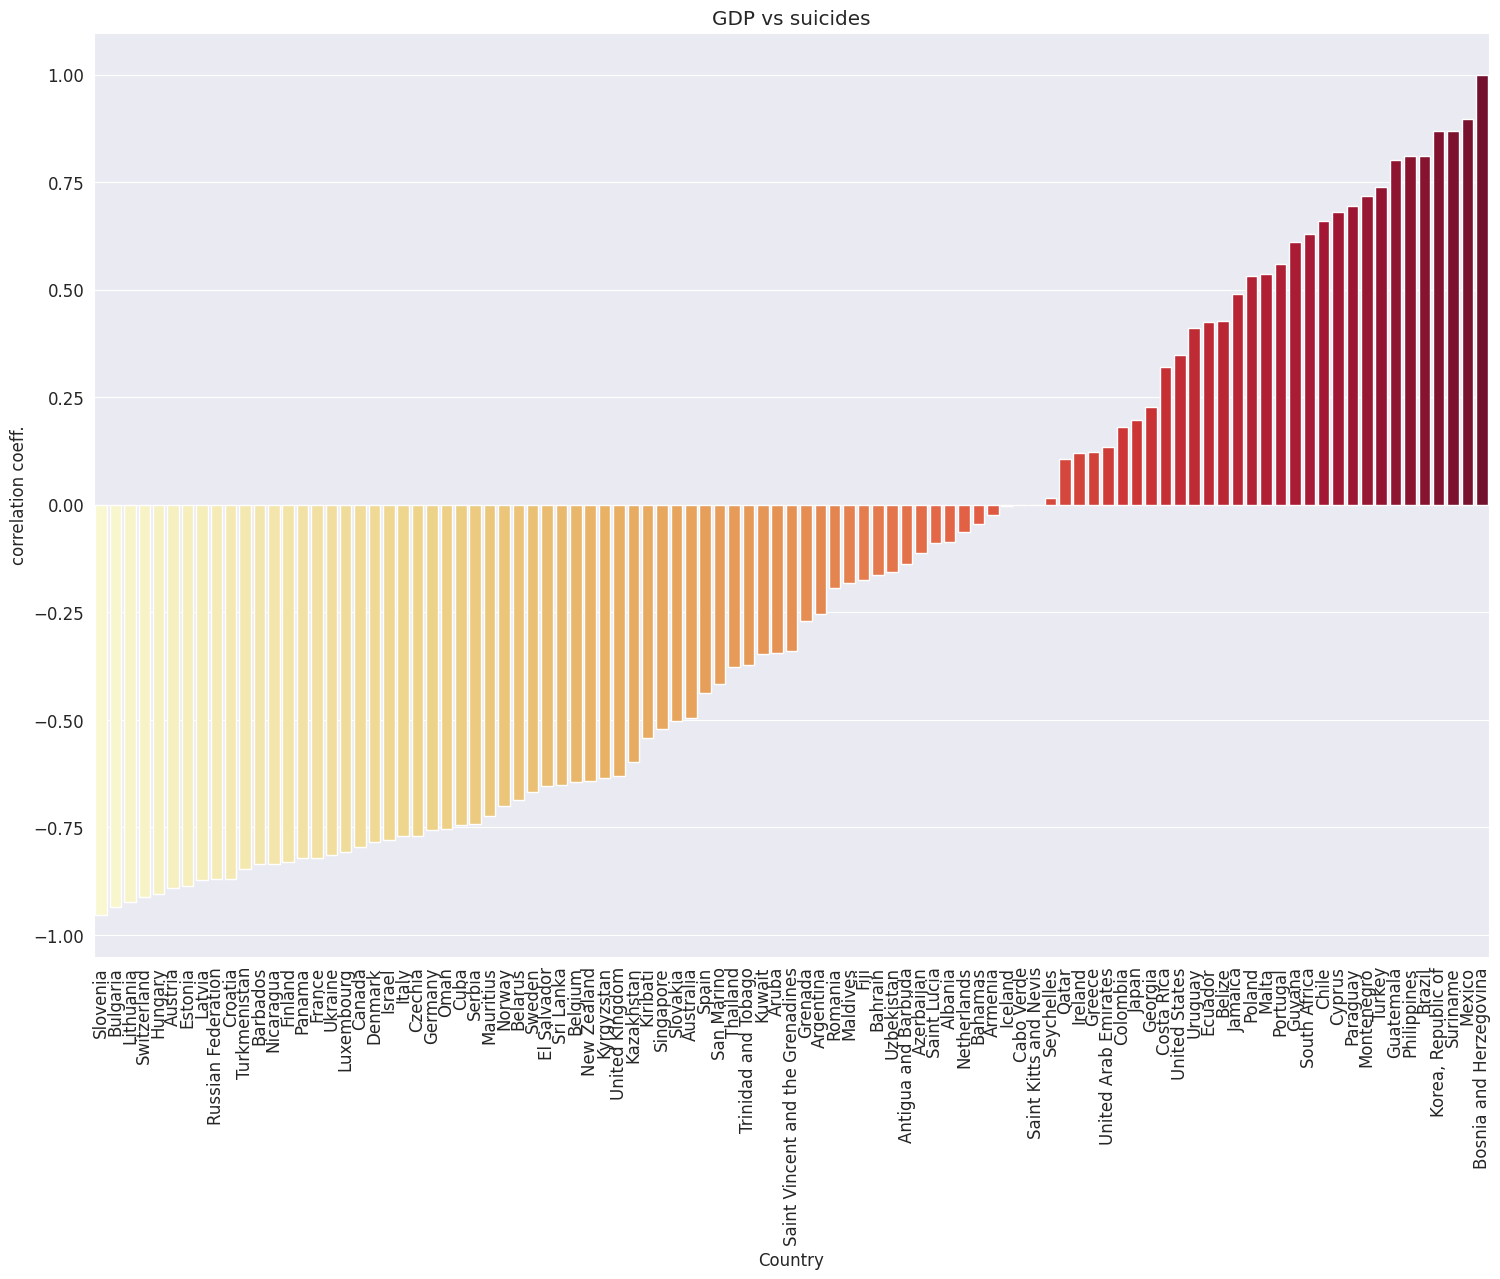

In [499]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()


<h5> correlation coefficiency of all countries according GDP vs Suicidal ratio</h5>

In [500]:
high_relation_gdp = {a:b for a,b in dgp_relation.items() if b <= -0.6}
print(len(high_relation_gdp))
high_relation_gdp

37


{'Slovenia': -0.9529455791278115,
 'Bulgaria': -0.936051854947298,
 'Lithuania': -0.9239757987267332,
 'Switzerland': -0.9109503853299822,
 'Hungary': -0.9040354533627301,
 'Austria': -0.8910105398756447,
 'Estonia': -0.8871441228139314,
 'Latvia': -0.8730699831833395,
 'Russian Federation': -0.8691195442113794,
 'Croatia': -0.8688905854455011,
 'Turkmenistan': -0.8456182204925115,
 'Barbados': -0.8340490690934337,
 'Nicaragua': -0.8339461195785591,
 'Finland': -0.8315060396122902,
 'Panama': -0.8211200154534327,
 'France': -0.8209880459616336,
 'Ukraine': -0.8149936384948906,
 'Luxembourg': -0.8069826383976239,
 'Canada': -0.7947703785559362,
 'Denmark': -0.785030750255649,
 'Israel': -0.7798979101866839,
 'Italy': -0.7708964392738602,
 'Czechia': -0.7706689026781656,
 'Germany': -0.7567584036061585,
 'Oman': -0.7547353920453065,
 'Cuba': -0.7437036777206897,
 'Serbia': -0.7411928190991895,
 'Mauritius': -0.7245244457528448,
 'Norway': -0.7008906466696495,
 'Belarus': -0.6864193402328

In [501]:
positive_relation_gdp = {a:b for a,b in corr_eff.items() if b > 0.6}
positive_relation_tup = list(positive_relation_gdp.items())
positive_relation_tup.sort(key= lambda pair:pair[1], reverse = True)
positive_relation = {a[0]:a[1] for a in positive_relation_tup}
print(len(positive_relation))
positive_relation

14


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Mexico': 0.8960134273432983,
 'Suriname': 0.87018200612299,
 'Korea, Republic of': 0.8699633989169062,
 'Brazil': 0.8106646381533371,
 'Philippines': 0.8099497394094539,
 'Guatemala': 0.8024303859780251,
 'Turkey': 0.7398789818429371,
 'Montenegro': 0.7172092535669516,
 'Paraguay': 0.6952944408878107,
 'Cyprus': 0.6812947745988278,
 'Chile': 0.6597157515278939,
 'South Africa': 0.6287573335302014,
 'Guyana': 0.6110448174036198}

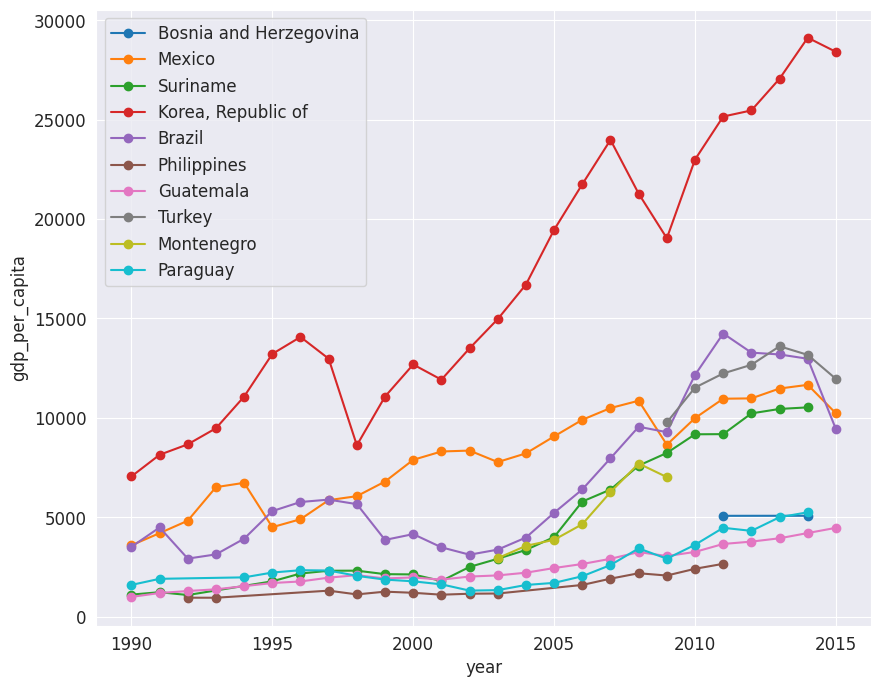

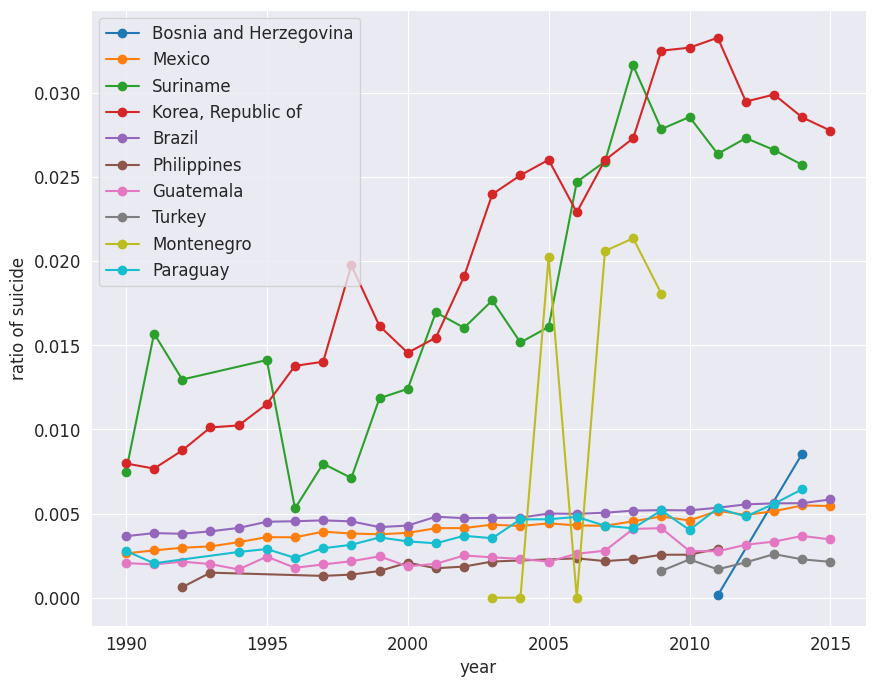

In [502]:
city_list = list({a:b for a,b in positive_relation.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

for country in city_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

<h5> yearly positive correlation coefficiency countrys "suicide ratio vs year" in one plot  and "year vs GDP per Capital" showing in another plot</h5>

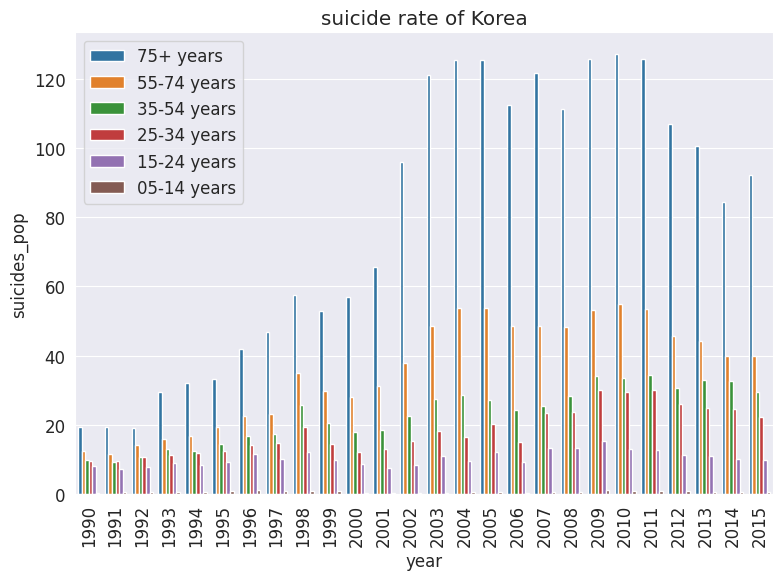

In [503]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Korea, Republic of"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()
plt.show()

<h5> yearly suicide ratio of corea for different ages and here also we see that 75+ years have the highest suicide ratio score</h5>

In [504]:
without_relation_gdp = {a:b for a,b in corr_eff.items() if -0.3 < b < 0.3}
no_relation_gdp = [i for i in country_list[:20] if i in without_relation_gdp.keys()]
no_relation_gdp

['Japan']

<h5> japan's has no correlation coefficiency, that's mean the value of cor_coef of japan is 0</h5>

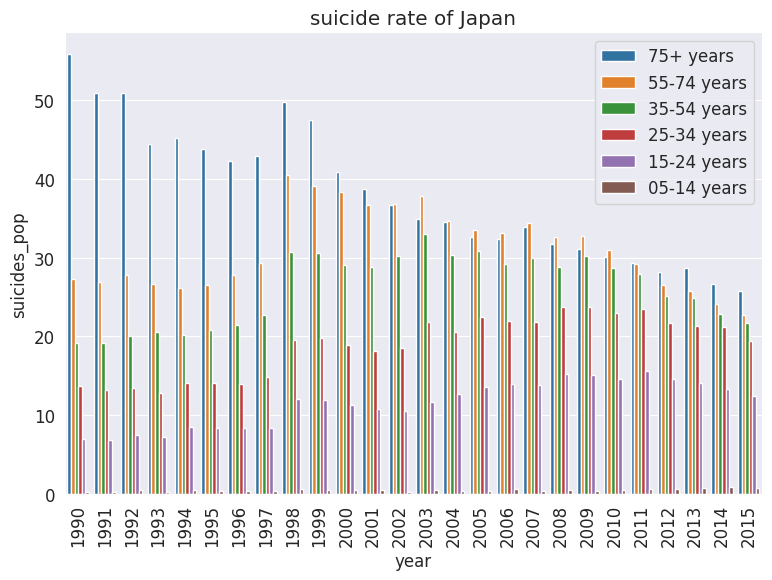

In [505]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Japan"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Japan" )
plt.legend()
plt.show()

<h5> yearly suicide ratio of japan of different ages</h5>

In [506]:
df['age']

0        35-54 years
1        15-24 years
2        55-74 years
3        25-34 years
4        15-24 years
            ...     
24361    35-54 years
24362      75+ years
24363    05-14 years
24364    05-14 years
24365    55-74 years
Name: age, Length: 24366, dtype: object

<h2>Building a Model</h2>
<h5>We will build a model to predict the top most features which is highly related to suicides per 100k population</h5>

In [507]:
df.dtypes

country            object
year                int64
sex                object
age                object
suicides_no         int64
population          int64
suicides_pop      float64
HDI_for_year      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
dtype: object

In [508]:
# Suicide_Pred = df[['country','year','sex','age','suicides_pop','gdp_per_capita','generation']]
# Suicide_Pred.head()
Suicide_Pred = df[['country','year','sex','age','suicides_no','population','suicides_pop','gdp_per_capita','HDI_for_year','generation','gdp_for_year']]
Suicide_Pred.head()

country  year     sex          age  suicides_no  population  suicides_pop  \
0  Albania  1992    male  35-54 years           12      343800          3.49   
1  Albania  1992    male  15-24 years            9      263700          3.41   
2  Albania  1992    male  55-74 years            5      159500          3.13   
3  Albania  1992    male  25-34 years            7      245500          2.85   
4  Albania  1992  female  15-24 years            7      292400          2.39   

   gdp_per_capita  HDI_for_year    generation gdp_for_year  
0             251         0.614       Boomers    709452584  
1             251         0.614  Generation X    709452584  
2             251         0.614        Silent    709452584  
3             251         0.614       Boomers    709452584  
4             251         0.614  Generation X    709452584

In [509]:
Suicide_Pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24366 non-null  object 
 1   year            24366 non-null  int64  
 2   sex             24366 non-null  object 
 3   age             24366 non-null  object 
 4   suicides_no     24366 non-null  int64  
 5   population      24366 non-null  int64  
 6   suicides_pop    24366 non-null  float64
 7   gdp_per_capita  24366 non-null  int64  
 8   HDI_for_year    24366 non-null  float64
 9   generation      24366 non-null  object 
 10  gdp_for_year    24366 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.0+ MB


<h2>Creating dummies</h2>

In [510]:
status = pd.get_dummies(Suicide_Pred['sex'], drop_first = True)
Suicide_Pred = pd.concat([Suicide_Pred, status], axis = 1)
Suicide_Pred.drop(['sex'], axis = 1, inplace = True)

In [511]:
status = pd.get_dummies(Suicide_Pred['age'], drop_first = True)
Suicide_Pred = pd.concat([Suicide_Pred, status], axis = 1)
Suicide_Pred.drop(['age'], axis = 1, inplace = True)

In [512]:
status = pd.get_dummies(Suicide_Pred['generation'], drop_first = True)
Suicide_Pred = pd.concat([Suicide_Pred, status], axis = 1)
Suicide_Pred.drop(['generation'], axis = 1, inplace = True)

In [513]:
status = pd.get_dummies(Suicide_Pred['country'], drop_first = True)
Suicide_Pred = pd.concat([Suicide_Pred, status], axis = 1)
Suicide_Pred.drop(['country'], axis = 1, inplace = True)

In [514]:
status = pd.get_dummies(Suicide_Pred['year'], drop_first = True)
Suicide_Pred = pd.concat([Suicide_Pred, status], axis = 1)
Suicide_Pred.drop(['year'], axis = 1, inplace = True)

In [515]:
Suicide_Pred.head()

suicides_no  population  suicides_pop  gdp_per_capita  HDI_for_year  \
0           12      343800          3.49             251         0.614   
1            9      263700          3.41             251         0.614   
2            5      159500          3.13             251         0.614   
3            7      245500          2.85             251         0.614   
4            7      292400          2.39             251         0.614   

  gdp_for_year   male  15-24 years  25-34 years  35-54 years  55-74 years  \
0    709452584   True        False        False         True        False   
1    709452584   True         True        False        False        False   
2    709452584   True        False        False        False         True   
3    709452584   True        False         True        False        False   
4    709452584  False         True        False        False        False   

   75+ years  G.I. Generation  Generation X  Generation Z  Millenials  Silent  \
0      False            False         False         False       False   False   
1      False            False          True         False       False   False   
2      False            False         False         False       False    True   
3      False            False         False         False       False   False   
4      False            False          True         False       False   False   

   Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  Austria  \
0                False      False    False  False      False    False   
1                False      False    False  False      False    False   
2                False      False    False  False      False    False   
3                False      False    False  False      False    False   
4                False      False    False  False      False    False   

   Azerbaijan  Bahamas  Bahrain  Barbados  Belarus  Belgium  Belize  \
0       False    False    False     False    False    False   False   
1       False    False    False     False    False    False   False   
2       False    False    False     False    False    False   False   
3       False    False    False     False    False    False   False   
4       False    False    False     False    False    False   False   

   Bosnia and Herzegovina  Brazil  Bulgaria  Cabo Verde  Canada  Chile  \
0                   False   False     False       False   False  False   
1                   False   False     False       False   False  False   
2                   False   False     False       False   False  False   
3                   False   False     False       False   False  False   
4                   False   False     False       False   False  False   

   Colombia  Costa Rica  Croatia   Cuba  Cyprus  Czechia  Denmark  Ecuador  \
0     False       False    False  False   False    False    False    False   
1     False       False    False  False   False    False    False    False   
2     False       False    False  False   False    False    False    False   
3     False       False    False  False   False    False    False    False   
4     False       False    False  False   False    False    False    False   

   El Salvador  Estonia   Fiji  Finland  France  Georgia  Germany  Greece  \
0        False    False  False    False   False    False    False   False   
1        False    False  False    False   False    False    False   False   
2        False    False  False    False   False    False    False   False   
3        False    False  False    False   False    False    False   False   
4        False    False  False    False   False    False    False   False   

   Grenada  Guatemala  Guyana  Hungary  Iceland  Ireland  Israel  Italy  \
0    False      False   False    False    False    False   False  False   
1    False      False   False    False    False    False   False  False   
2    False      False   False    False    False    False   False  False   
3    False      False   False    False    False    False   False 

In [516]:
Suicide_Pred['suicides_pop'] = Suicide_Pred['suicides_pop'].apply(lambda x: x**0.2)

<h5>for normalizing the suicides_pop column we use a finction that is x=x^0.2</h5>

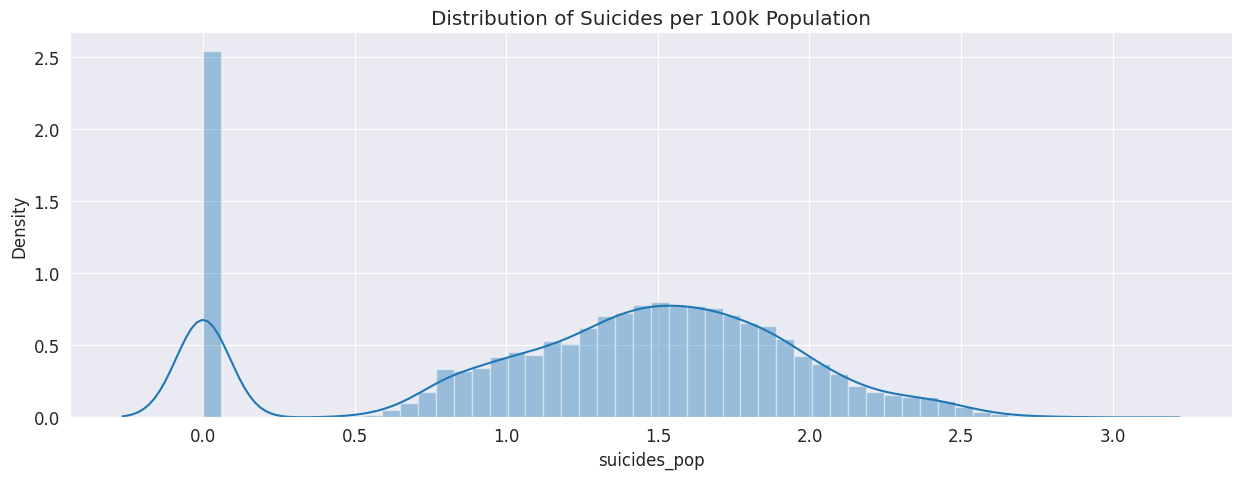

In [517]:
plt.figure(figsize=(15,5))
sns.distplot(Suicide_Pred['suicides_pop'],hist=True)
plt.title('Distribution of Suicides per 100k Population')
plt.show()

<h5>distribution ploting of suicides_pop column from suicide_pred dataframe</h5>

In [518]:
from sklearn.model_selection import train_test_split

<h2>Only taking a small sample for the purpose of a training. The rest will be used for testing.<h2>

In [519]:
df_train, df_test = train_test_split(Suicide_Pred, train_size = 0.1, random_state = 100)

In [520]:
from sklearn.preprocessing import MinMaxScaler

In [521]:
scaler = MinMaxScaler()
num_vars = ['suicides_pop', 'gdp_per_capita']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [522]:
y_train = df_train.pop('suicides_pop')
X_train = df_train

<h5>minmax Scaling for two numeric columns</h5>

<h2>Using RFE to select the best features.</h2>

In [523]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [524]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['year', 'suicides_no', 'population', 'suicides_pop', 'HDI_for_year',
       'gdp_per_capita'],
      dtype='object')

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_train.columns = X_train.columns.astype(str)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=30)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

<h5> performs linear regression and  applies feature selection using the RFE. The RFE selects a subset of  30 most relevant features from the input data based on predicting the target variable.</h5>

In [526]:
print(X_train.columns)
print(X_train)

Index(['suicides_no', 'population', 'gdp_per_capita', 'HDI_for_year',
       'gdp_for_year', 'male', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=138)
       suicides_no  population  gdp_per_capita  HDI_for_year   gdp_for_year  \
19935           15      135118        0.023969         0.701    16452201101   
14712            8      184083        0.065646         0.755    10003670690   
1110             0        5160        0.139925         0.826     1320670391   
21354            8       70174        0.080435         0.764     5145757576   
16964          376     5316400        0.021961         0.741   110803391517   
...            ...         ...             ...           ...            ...   
79               6      188200        0.004649         0.657     2707123772   
12119         2543     7822984        0.370885         0.898

In [527]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('suicides_no', False, 106),
 ('population', False, 107),
 ('gdp_per_capita', False, 93),
 ('HDI_for_year', False, 51),
 ('gdp_for_year', False, 109),
 ('male', True, 1),
 ('15-24 years', True, 1),
 ('25-34 years', True, 1),
 ('35-54 years', True, 1),
 ('55-74 years', True, 1),
 ('75+ years', True, 1),
 ('G.I. Generation', False, 72),
 ('Generation X', False, 99),
 ('Generation Z', False, 102),
 ('Millenials', False, 94),
 ('Silent', False, 73),
 ('Antigua and Barbuda', True, 1),
 ('Argentina', False, 45),
 ('Armenia', False, 104),
 ('Aruba', True, 1),
 ('Australia', False, 38),
 ('Austria', False, 9),
 ('Azerbaijan', False, 65),
 ('Bahamas', True, 1),
 ('Bahrain', True, 1),
 ('Barbados', True, 1),
 ('Belarus', False, 4),
 ('Belgium', False, 18),
 ('Belize', True, 1),
 ('Bosnia and Herzegovina', True, 1),
 ('Brazil', False, 58),
 ('Bulgaria', False, 35),
 ('Cabo Verde', False, 108),
 ('Canada', False, 30),
 ('Chile', False, 40),
 ('Colombia', False, 59),
 ('Costa Rica', False, 57),
 (

<h5>Showinng which features have or which features are not and their ranking </h5>

In [528]:
col = X_train.columns[rfe.support_]
col

Index(['male', '15-24 years', '25-34 years', '35-54 years', '55-74 years',
       '75+ years', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Bahrain',
       'Barbados', 'Belize', 'Bosnia and Herzegovina', 'Cyprus', 'Grenada',
       'Jamaica', 'Kiribati', 'Lithuania', 'Maldives', 'Malta', 'Oman',
       'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Seychelles',
       'South Africa', 'Sri Lanka', 'United Arab Emirates'],
      dtype='object')

In [529]:
X_train_rfe = X_train[col]

In [530]:

import statsmodels.api as sm

# Convert y_train to numeric type
y_train = y_train.astype(float)

# Convert X_train_rfe to numeric type
X_train_rfe = X_train_rfe.astype(float)

# Add constant column to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Fit the OLS model
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           suicides_pop   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:44:50   Log-Likelihood:                 1299.9
No. Observations:                2436   AIC:                            -2538.
Df Residuals:                    2405   BIC:                            -2358.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [531]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [532]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                              const  7.40
6                          75+ years  1.75
2                        15-24 years  1.72
4                        35-54 years  1.72
3                        25-34 years  1.71
5                        55-74 years  1.70
12                            Belize  1.01
24                       Saint Lucia  1.01
20                             Malta  1.01
18                         Lithuania  1.01
1                               male  1.01
15                           Grenada  1.01
10                           Bahrain  1.01
7                Antigua and Barbuda  1.01
11                          Barbados  1.00
22                             Qatar  1.00
29                         Sri Lanka  1.00
28                      South Africa  1.00
27                        Seychelles  1.00
26                        San Marino  1.00
25  Saint Vincent and the Grenadines  1.00
23             Saint Kitts and Nevis  1.00
21                              Oman  1.00
13            Bosnia and Herzegovina  1.00
8                              Aruba  1.00
19                          Maldives  1.00
9                            Bahamas  1.00
17                          Kiribati  1.00
16                           Jamaica  1.00
14                            Cyprus  1.00
30              United Arab Emirates  1.00

#These VIF scores of R-squared scores make sense since the distribution obtained after transformation is still far from normal.

In [533]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [534]:
df.head()

country  year     sex          age  suicides_no  population  suicides_pop  \
0  Albania  1992    male  35-54 years           12      343800          3.49   
1  Albania  1992    male  15-24 years            9      263700          3.41   
2  Albania  1992    male  55-74 years            5      159500          3.13   
3  Albania  1992    male  25-34 years            7      245500          2.85   
4  Albania  1992  female  15-24 years            7      292400          2.39   

   HDI_for_year gdp_for_year  gdp_per_capita    generation  
0         0.614    709452584             251       Boomers  
1         0.614    709452584             251  Generation X  
2         0.614    709452584             251        Silent  
3         0.614    709452584             251       Boomers  
4         0.614    709452584             251  Generation X

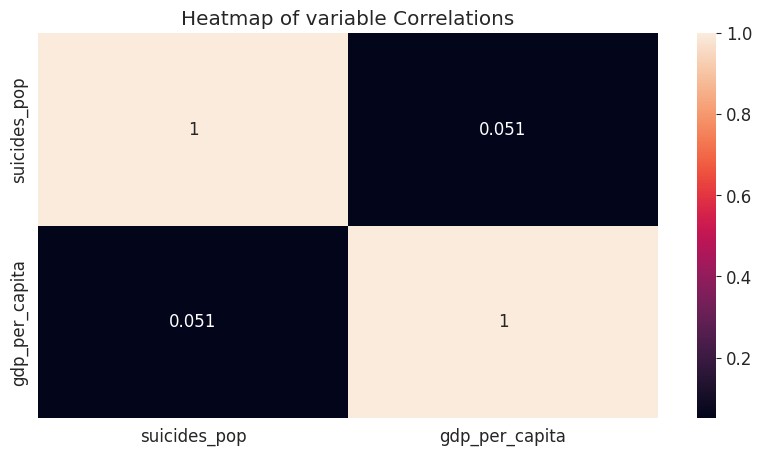

In [535]:
plt.figure(figsize=(10,5))
sns.heatmap(Suicide_Pred[['suicides_pop','gdp_per_capita']].corr(),annot=True)
plt.title('Heatmap of variable Correlations')
plt.show()

In [536]:
Suicide_Pred.dtypes

suicides_no         int64
population          int64
suicides_pop      float64
gdp_per_capita      int64
HDI_for_year      float64
                   ...   
2012                 bool
2013                 bool
2014                 bool
2015                 bool
2016                 bool
Length: 139, dtype: object

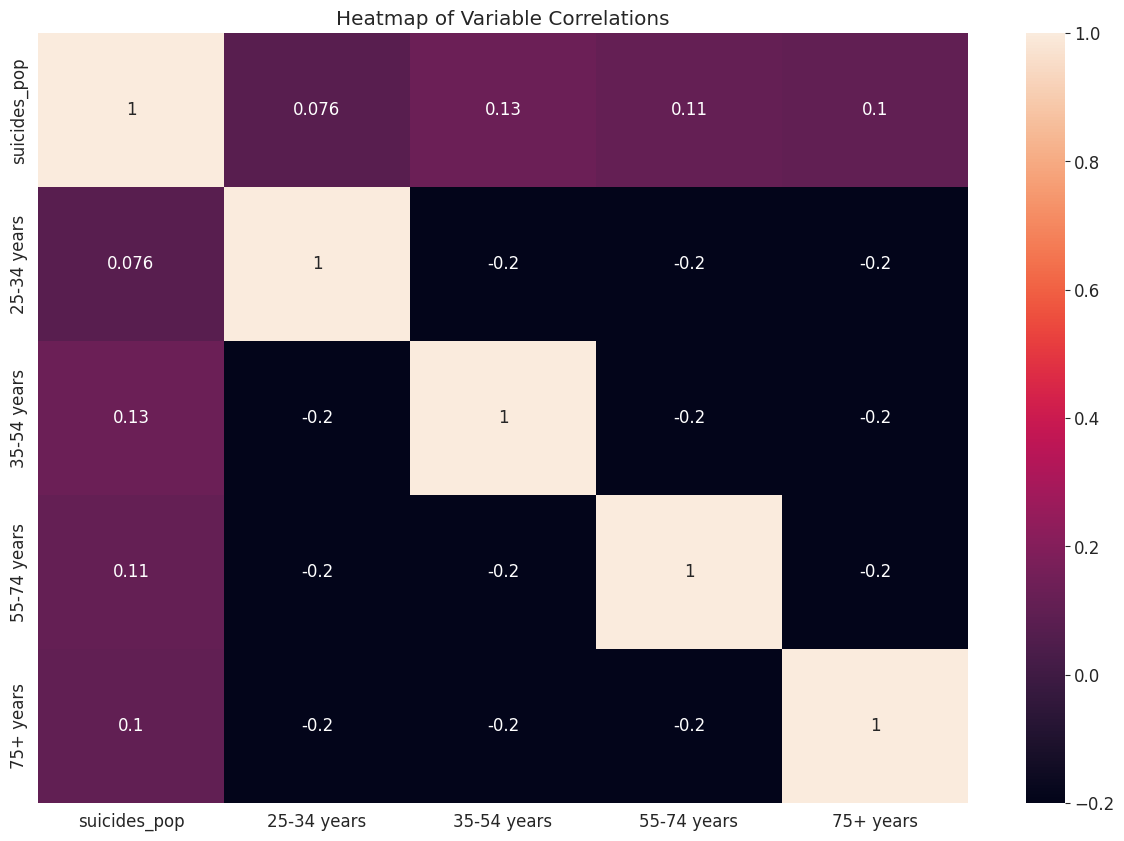

In [537]:
plt.figure(figsize=(15,10))
sns.heatmap(Suicide_Pred[['suicides_pop','25-34 years','35-54 years','55-74 years','75+ years']].corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [538]:
df.head()

country  year     sex          age  suicides_no  population  suicides_pop  \
0  Albania  1992    male  35-54 years           12      343800          3.49   
1  Albania  1992    male  15-24 years            9      263700          3.41   
2  Albania  1992    male  55-74 years            5      159500          3.13   
3  Albania  1992    male  25-34 years            7      245500          2.85   
4  Albania  1992  female  15-24 years            7      292400          2.39   

   HDI_for_year gdp_for_year  gdp_per_capita    generation  
0         0.614    709452584             251       Boomers  
1         0.614    709452584             251  Generation X  
2         0.614    709452584             251        Silent  
3         0.614    709452584             251       Boomers  
4         0.614    709452584             251  Generation X

In [539]:
X = Suicide_Pred.drop('suicides_pop',axis=1)
y = Suicide_Pred['suicides_pop']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.1,random_state=100)

In [540]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import sklearn

In [541]:
X_train

suicides_no  population  gdp_per_capita  HDI_for_year   gdp_for_year  \
19935           15      135118            3334         0.701    16452201101   
14712            8      184083            8587         0.755    10003670690   
1110             0        5160           17949         0.826     1320670391   
21354            8       70174           10451         0.764     5145757576   
16964          376     5316400            3081         0.741   110803391517   
...            ...         ...             ...           ...            ...   
79               6      188200             899         0.657     2707123772   
12119         2543     7822984           47059         0.898  5700098114744   
14147            0       28689            8135         0.700     2774351760   
23320            4     3975507           29832         0.855  1665623685488   
5640            58      306107           10722         0.802    45416358502   

        male  15-24 years  25-34 years  35-54 years  55-74 years  75+ years  \
19935  False        False        False        False        False       True   
14712  False        False        False         True        False      False   
1110   False        False        False        False         True      False   
21354  False        False        False         True        False      False   
16964  False        False        False         True        False      False   
...      ...          ...          ...          ...          ...        ...   
79     False        False        False        False         True      False   
12119   True        False         True        False        False      False   
14147  False        False        False        False        False      False   
23320   True        False        False        False        False      False   
5640    True        False         True        False        False      False   

       G.I. Generation  Generation X  Generation Z  Millenials  Silent  \
19935             True         False         False       False   False   
14712            False          True         False       False   False   
1110             False         False         False       False    True   
21354            False          True         False       False   False   
16964            False         False         False       False   False   
...                ...           ...           ...         ...     ...   
79               False         False         False       False    True   
12119            False          True         False       False   False   
14147            False         False          True       False   False   
23320            False         False         False        True   False   
5640             False          True         False       False   False   

       Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  Austria  \
19935                False      False    False  False      False    False   
14712                False      False    False  False      False    False   
1110                 False      False    False   True      False    False   
21354                False      False    False  False      False    False   
16964                False      False    False  False      False    False   
...                    ...        ...      ...    ...        ...      ...   
79                   False      False    False  False      False    False   
12119                False      False    False  False      False    False   
14147                False      False    False  False      False    False   
23320                False      False    False  False      False    False   
5640                 False      False    False  False      False    False   

       Azerbaijan  Bahamas  Bahrain  Barbados  Belarus  Belgium  Belize  \
19935       False    False    False     False    False    False   False   
14712       False    False    False     False    False    False   False   
1110        False    False    False     False    False    False   Fals

In [542]:
X_test

suicides_no  population  gdp_per_capita  HDI_for_year  gdp_for_year  \
9092            19     1209324           13968         0.789  143157600025   
18950            0        8443            3613         0.709     347770000   
6501            43      454906           23010         0.889  227948349666   
17588            0       80919           93270         0.829  186833516484   
10564            2       34300           29740         0.838    7330965239   
...            ...         ...             ...           ...           ...   
4766            59     1327931            6744         0.787   99210392858   
7768             5      100705            4675         0.709    3523185920   
2930           162     1094844            1299         0.716   12354820144   
14329            2       42492           15916         0.825    6062780269   
2239             0        2617           32596         0.811    9836200000   

        male  15-24 years  25-34 years  35-54 years  55-74 years  75+ years  \
9092   False        False        False        False         True      False   
18950  False        False         True        False        False      False   
6501   False        False        False        False        False       True   
17588  False         True        False        False        False      False   
10564  False        False        False         True        False      False   
...      ...          ...          ...          ...          ...        ...   
4766   False         True        False        False        False      False   
7768   False        False        False         True        False      False   
2930   False        False        False        False         True      False   
14329  False        False        False        False         True      False   
2239    True        False        False        False        False       True   

       G.I. Generation  Generation X  Generation Z  Millenials  Silent  \
9092             False         False         False       False    True   
18950            False          True         False       False   False   
6501             False         False         False       False    True   
17588            False         False         False        True   False   
10564            False         False         False       False   False   
...                ...           ...           ...         ...     ...   
4766             False         False         False        True   False   
7768             False         False         False       False   False   
2930             False         False         False       False    True   
14329            False         False         False       False    True   
2239             False         False         False       False    True   

       Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  Austria  \
9092                 False      False    False  False      False    False   
18950                False      False    False  False      False    False   
6501                 False      False    False  False      False    False   
17588                False      False    False  False      False    False   
10564                False      False    False  False      False    False   
...                    ...        ...      ...    ...        ...      ...   
4766                 False      False    False  False      False    False   
7768                 False      False    False  False      False    False   
2930                 False      False    False  False      False    False   
14329                False      False    False  False      False    False   
2239                 False      False    False  False      False    False   

       Azerbaijan  Bahamas  Bahrain  Barbados  Belarus  Belgium  Belize  \
9092        False    False    False     False    False    False   False   
18950       False    False    False     False    False    False   False   
6501        False    False    False     False    False    False   False   
17588  

<h1>Machine Learning model</h1>

<h4>classifier models</h4>

In [543]:
model = RandomForestRegressor(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
         'min_samples_leaf':[5,10,20,30,50,100,150],
         'max_depth':[4,7,10,15,20,25,30],
         'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]}

grid_search = GridSearchCV(estimator=model,param_grid=params,verbose=1,n_jobs=-1,scoring='r2')


In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import warnings
%matplotlib inline

In [545]:
# Set some default options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
warnings.filterwarnings('ignore')

In [546]:
raw_df = pd.read_csv('/content/main_suicides.csv')
raw_df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1992    male  35-54 years           12      343800   
1  Albania  1992    male  15-24 years            9      263700   
2  Albania  1992    male  55-74 years            5      159500   
3  Albania  1992    male  25-34 years            7      245500   
4  Albania  1992  female  15-24 years            7      292400   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               3.49  Albania1992         0.614        709,452,584   
1               3.41  Albania1992         0.614        709,452,584   
2               3.13  Albania1992         0.614        709,452,584   
3               2.85  Albania1992         0.614        709,452,584   
4               2.39  Albania1992         0.614        709,452,584   

   gdp_per_capita ($)    generation  
0                 251       Boomers  
1                 251  Generation X  
2                 251        Silent  
3                 251       Boomers  
4                 251  Generation X

In [547]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             24366 non-null  object 
 1   year                24366 non-null  int64  
 2   sex                 24366 non-null  object 
 3   age                 24366 non-null  object 
 4   suicides_no         24366 non-null  int64  
 5   population          24366 non-null  int64  
 6   suicides/100k pop   24366 non-null  float64
 7   country-year        24366 non-null  object 
 8   HDI for year        24366 non-null  float64
 9    gdp_for_year ($)   24366 non-null  object 
 10  gdp_per_capita ($)  24366 non-null  int64  
 11  generation          24366 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.2+ MB


In [548]:
raw_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)
raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [549]:
# Check missing value and drop duplicate rows for the same country and same year
raw_df.loc[raw_df['HDI for year'].isna(), ['country', 'year']].drop_duplicates()
raw_df

country  year     sex          age  suicides_no  population  \
0         Albania  1992    male  35-54 years           12      343800   
1         Albania  1992    male  15-24 years            9      263700   
2         Albania  1992    male  55-74 years            5      159500   
3         Albania  1992    male  25-34 years            7      245500   
4         Albania  1992  female  15-24 years            7      292400   
...           ...   ...     ...          ...          ...         ...   
24361  Uzbekistan  2014  female  35-54 years          107     3620833   
24362  Uzbekistan  2014  female    75+ years            9      348465   
24363  Uzbekistan  2014    male   5-14 years           60     2762158   
24364  Uzbekistan  2014  female   5-14 years           44     2631600   
24365  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year gdp_for_year ($)  \
0                   3.49     Albania1992         0.614      709,452,584   
1                   3.41     Albania1992         0.614      709,452,584   
2                   3.13     Albania1992         0.614      709,452,584   
3                   2.85     Albania1992         0.614      709,452,584   
4                   2.39     Albania1992         0.614      709,452,584   
...                  ...             ...           ...              ...   
24361               2.96  Uzbekistan2014         0.624   63,067,077,179   
24362               2.58  Uzbekistan2014         0.624   63,067,077,179   
24363               2.17  Uzbekistan2014         0.624   63,067,077,179   
24364               1.67  Uzbekistan2014         0.624   63,067,077,179   
24365               1.46  Uzbekistan2014         0.624   63,067,077,179   

       gdp_per_capita ($)    generation  
0                     251       Boomers  
1                     251  Generation X  
2                     251        Silent  
3                     251       Boomers  
4                     251  Generation X  
...                   ...           ...  
24361                2309  Generation X  
24362                2309        Silent  
24363                2309  Generation Z  
24364                2309  Generation Z  
24365                2309       Boomers  

[24366 rows x 12 columns]

In [550]:
hdi_df = raw_df['HDI for year']
hdi_df.head()

0    0.614
1    0.614
2    0.614
3    0.614
4    0.614
Name: HDI for year, dtype: float64

In [551]:
raw_df.loc[raw_df['HDI for year'].isna(), ['country', 'year']].drop_duplicates()
raw_df


country  year     sex          age  suicides_no  population  \
0         Albania  1992    male  35-54 years           12      343800   
1         Albania  1992    male  15-24 years            9      263700   
2         Albania  1992    male  55-74 years            5      159500   
3         Albania  1992    male  25-34 years            7      245500   
4         Albania  1992  female  15-24 years            7      292400   
...           ...   ...     ...          ...          ...         ...   
24361  Uzbekistan  2014  female  35-54 years          107     3620833   
24362  Uzbekistan  2014  female    75+ years            9      348465   
24363  Uzbekistan  2014    male   5-14 years           60     2762158   
24364  Uzbekistan  2014  female   5-14 years           44     2631600   
24365  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year gdp_for_year ($)  \
0                   3.49     Albania1992         0.614      709,452,584   
1                   3.41     Albania1992         0.614      709,452,584   
2                   3.13     Albania1992         0.614      709,452,584   
3                   2.85     Albania1992         0.614      709,452,584   
4                   2.39     Albania1992         0.614      709,452,584   
...                  ...             ...           ...              ...   
24361               2.96  Uzbekistan2014         0.624   63,067,077,179   
24362               2.58  Uzbekistan2014         0.624   63,067,077,179   
24363               2.17  Uzbekistan2014         0.624   63,067,077,179   
24364               1.67  Uzbekistan2014         0.624   63,067,077,179   
24365               1.46  Uzbekistan2014         0.624   63,067,077,179   

       gdp_per_capita ($)    generation  
0                     251       Boomers  
1                     251  Generation X  
2                     251        Silent  
3                     251       Boomers  
4                     251  Generation X  
...                   ...           ...  
24361                2309  Generation X  
24362                2309        Silent  
24363                2309  Generation Z  
24364                2309  Generation Z  
24365                2309       Boomers  

[24366 rows x 12 columns]

In [552]:
min_hdi_df = raw_df[['country', 'HDI for year']].groupby('country').agg({"HDI for year": "min"})
min_hdi_df.head()

HDI for year
country                          
Albania                     0.614
Antigua and Barbuda         0.751
Argentina                   0.705
Armenia                     0.616
Aruba                       0.826

In [553]:
# Convert the dataframe to dict
min_hdi_dict = min_hdi_df.to_dict()

# Map missing HDI value according to the input dict
mask = raw_df['HDI for year'].isna()
raw_df.loc[mask, 'HDI for year'] = raw_df.loc[mask, 'country'].apply(lambda x: min_hdi_dict['HDI for year'][x])

In [554]:
raw_df['HDI for year'].isna().sum()

0

In [555]:
raw_df.drop(columns=['country-year'], inplace=True)
raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [556]:
import geopandas

In [557]:
# Group the data by country and find the sum of suicides number and population
suicide_by_country_df = raw_df.groupby('country')[['suicides_no', 'population']].sum().reset_index()

# Calculate suicides/100k pop
suicide_by_country_df['suicides/100k pop'] = 100000 * suicide_by_country_df['suicides_no'] / suicide_by_country_df['population']

# Sort the rows by suicides/100k pop from highest to lowest
suicide_by_country_df.sort_values(by='suicides/100k pop', ascending=False, inplace=True)
suicide_by_country_df.head()

country  suicides_no  population  suicides/100k pop
51           Lithuania        28039    68085210          41.182219
71  Russian Federation      1171821  3555358820          32.959289
11             Belarus        59892   197372292          30.344685
39             Hungary        73891   248644256          29.717558
83           Sri Lanka        44628   154567226          28.872874

<h5>find those countries which name is not matched with the real name and replace that with their actual name</h5>

In [558]:
# Create additional column for suicide risk and set the default value as low
raw_df['suicide_risk'] = 'low'

# Set the risk as high if suicides/100k pop is higher than the mean
raw_df.loc[raw_df['suicides/100k pop'] > raw_df['suicides/100k pop'].mean(), 'suicide_risk'] = 'high'
raw_df['suicide_risk'].value_counts()

suicide_risk
low     16719
high     7647
Name: count, dtype: int64

<h5>Creating an extra column for better performance of classification model</h5>

In [559]:
# Create a series containing number of data per year
year_dt = raw_df.year.value_counts()
year_dt.sort_index(inplace=True)
cum_pct = 100 * year_dt.cumsum() / year_dt.sum()
cum_pct

year
1990      3.053435
1991      6.106870
1992      9.209554
1993     12.312238
1994     15.513420
1995     19.256341
1996     22.999261
1997     26.742182
1998     30.583600
1999     34.622014
2000     38.758926
2001     42.994336
2002     47.131248
2003     51.317410
2004     55.405073
2005     59.492736
2006     63.629648
2007     67.815809
2008     71.952721
2009     76.286629
2010     80.571288
2011     84.757449
2012     88.697365
2013     92.588033
2014     96.380202
2015     99.384388
2016    100.000000
Name: count, dtype: float64

<h5>Yearly the cumulative sum of total data</h5>

In [560]:
print(year_dt)

year
1990     744
1991     744
1992     756
1993     756
1994     780
1995     912
1996     912
1997     912
1998     936
1999     984
2000    1008
2001    1032
2002    1008
2003    1020
2004     996
2005     996
2006    1008
2007    1020
2008    1008
2009    1056
2010    1044
2011    1020
2012     960
2013     948
2014     924
2015     732
2016     150
Name: count, dtype: int64


<h5>see each country contains how many rows</h5>

In [561]:
train_df = raw_df.loc[raw_df['year'] <= 2004]
val_df = raw_df.loc[(raw_df['year'] >= 2005) & (raw_df['year'] <=2010)]
test_df = raw_df.loc[raw_df['year'] >= 2011]

print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (13500, 12)
val_df.shape:  (6132, 12)
test_df.shape:  (4734, 12)


<h5>dataset are divided into train, test and validation</h5>

In [562]:
input_cols = ['country', 'sex', 'age', 'HDI for year', 'gdp_per_capita ($)']
target_col = 'suicide_risk'

In [563]:
train_inputs = train_df.loc[:, input_cols]
train_target = train_df.loc[:, target_col]

val_inputs = val_df.loc[:, input_cols]
val_target = val_df.loc[:, target_col]

test_inputs = test_df.loc[:, input_cols]
test_target = test_df.loc[:, target_col]

In [564]:
numeric_cols = list(train_inputs.select_dtypes(include=np.number).columns)
categorical_cols = list(train_inputs.select_dtypes(include='object').columns)

print('numeric columns: ', numeric_cols)
print('categorical columns: ', categorical_cols)

numeric columns:  ['gdp_per_capita ($)']
categorical columns:  ['country', 'sex', 'age', 'HDI for year']


In [565]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler to all the data
scaler = MinMaxScaler().fit(raw_df.loc[:, numeric_cols])

# Scale the train, validation and test sets
train_inputs.loc[:, numeric_cols] = scaler.transform(train_inputs.loc[:, numeric_cols])
val_inputs.loc[:, numeric_cols] = scaler.transform(val_inputs.loc[:, numeric_cols])
test_inputs.loc[:, numeric_cols] = scaler.transform(test_inputs.loc[:, numeric_cols])

<h5>numeric columns are preprocessed with minmax scalar</h5>

In [566]:
train_inputs[numeric_cols].describe()

gdp_per_capita ($)
count        13500.000000
mean             0.097220
std              0.105245
min              0.000000
25%              0.016526
50%              0.042410
75%              0.174598
max              0.637489

In [567]:
# Check the number of unique values of each categorical column
raw_df[categorical_cols].nunique()

country          97
sex               2
age               6
HDI for year    411
dtype: int64

In [568]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore').fit(raw_df[categorical_cols])

In [569]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Encode the columns
train_inputs[encoded_cols] = encoder.transform(train_inputs.loc[:, categorical_cols]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs.loc[:, categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs.loc[:, categorical_cols]).toarray()


<h5>Categorical columns are preprocessed with minmax scalar</h5>

In [570]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [571]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, train_target)

DecisionTreeClassifier(random_state=1)

In [572]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_pred = tree.predict(X_train)
accuracy_score(train_target, train_pred)

1.0

In [573]:
val_pred = tree.predict(X_val)
accuracy_score(val_target, val_pred)

0.8897586431833007

<h5>Training and validation accuracy are calculated</h5>

In [574]:
val_target.value_counts() / len(val_target)

suicide_risk
low     0.708415
high    0.291585
Name: count, dtype: float64

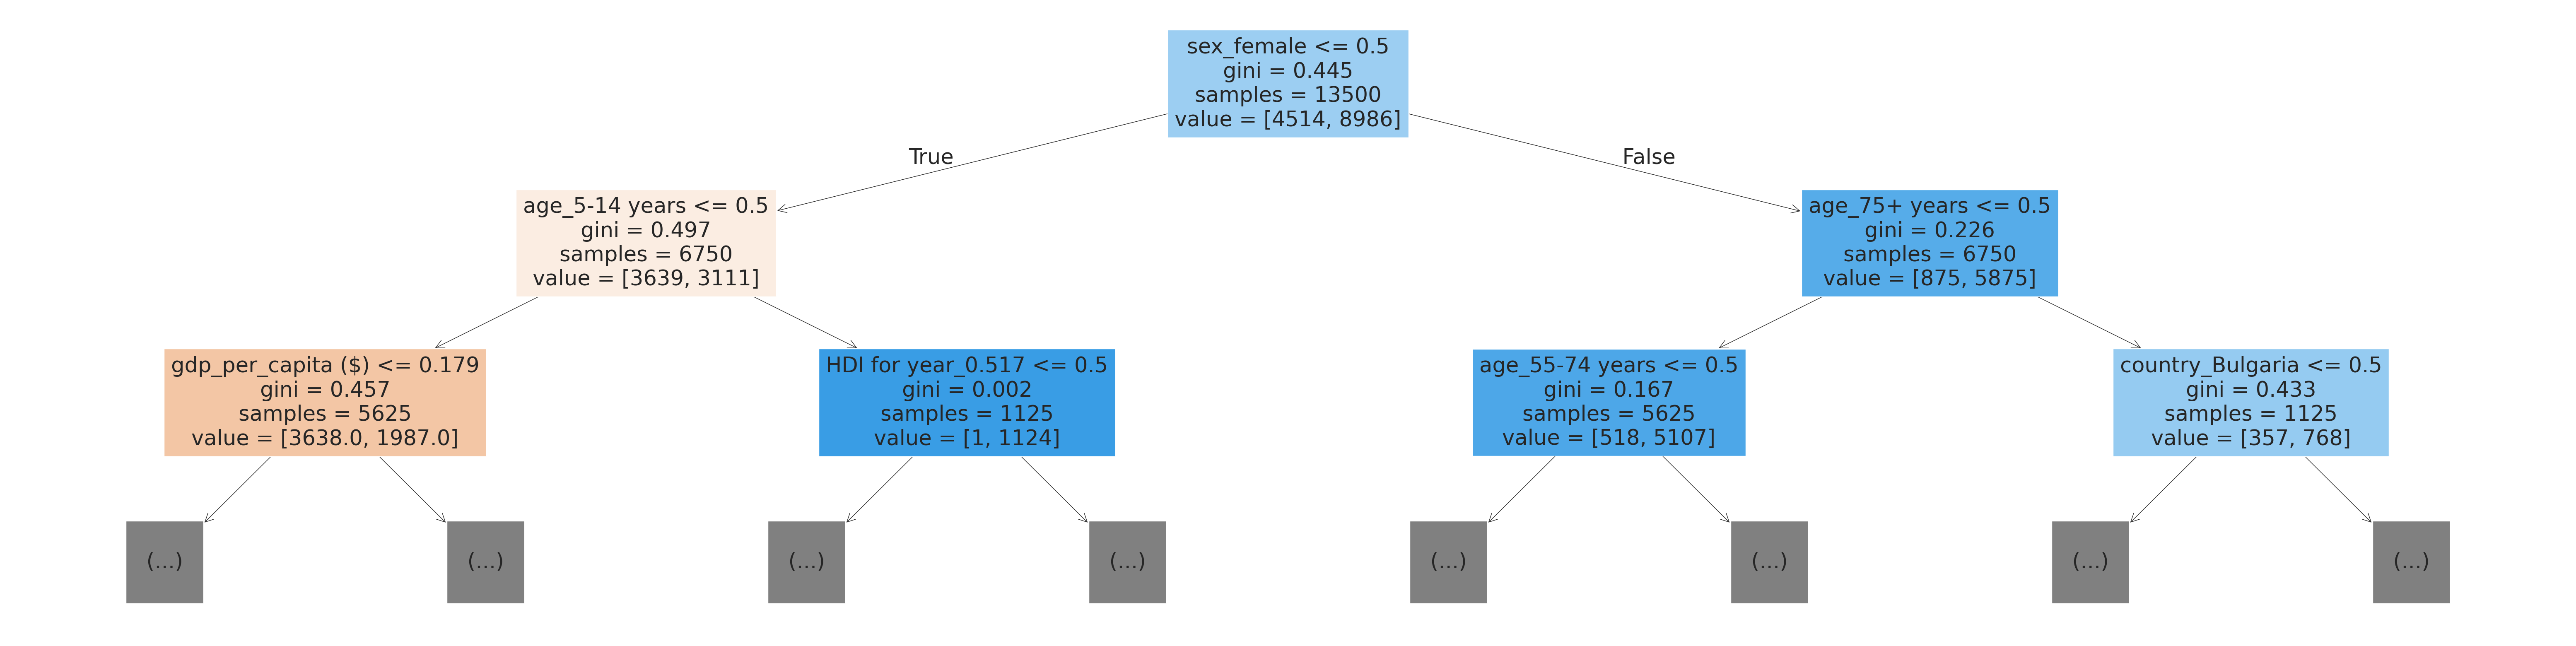

In [575]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
plot_tree(tree, feature_names=X_train.columns, max_depth=2, filled=True);

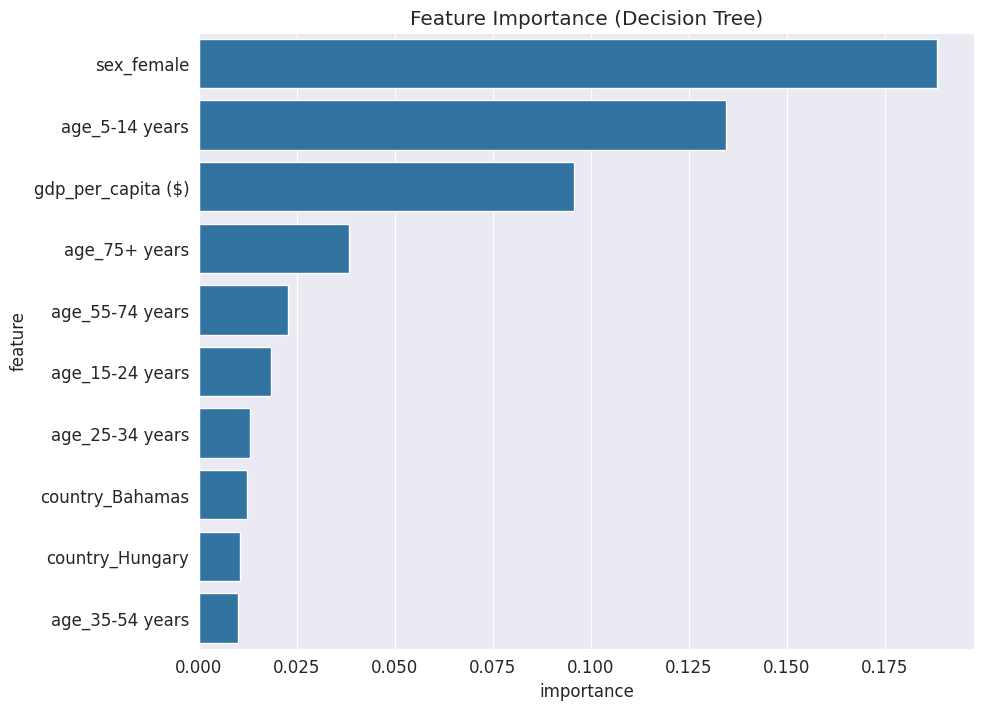

In [576]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree.feature_importances_
}).sort_values(by='importance', ascending=False)

# Visualize the feature importance
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance (Decision Tree)');

<h5>Showing which features get more importance for this model training</h5>

In [577]:
tree.tree_.max_depth

63

In [578]:
def max_depth_tuning(md):
    tree = DecisionTreeClassifier(random_state=1, max_depth=md)
    tree.fit(X_train, train_target)
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)
    train_error = 1 - accuracy_score(train_target, train_pred)
    val_error = 1 - accuracy_score(val_target, val_pred)
    return {'max_depth': md, 'train_error': train_error, 'val_error': val_error}

<h5>each depth levels training error and validation error</h5>

In [579]:
# Create a dataframe to store the tuning result
errors_df = pd.DataFrame([max_depth_tuning(md) for md in range(2, 43, 2)])

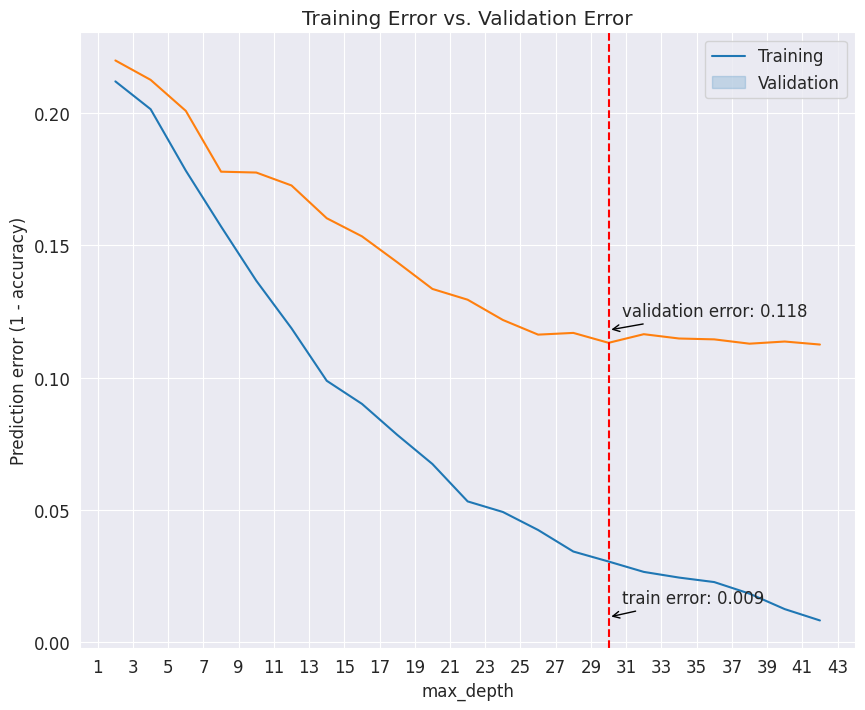

In [580]:
# Create a line plot to visualize training error and validation error against max_depth
fig, ax = plt.subplots()
sns.lineplot(data=errors_df, x='max_depth', y='train_error', ax=ax)
sns.lineplot(data=errors_df, x='max_depth', y='val_error', ax=ax)
plt.ylabel('Prediction error (1 - accuracy)')
plt.xticks(range(1, 44, 2))
plt.title('Training Error vs. Validation Error')
plt.legend(['Training', 'Validation'])

# Annotate the training error and validation error
plt.axvline(x=30, color='r', linestyle='--')
ax.annotate('validation error: 0.118',
            xy=(30, 0.117988),
            xycoords='data',
            fontsize=12,
            xytext=(10, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black',
                            connectionstyle="arc3"))
ax.annotate('train error: 0.009',
            xy=(30, 0.009398),
            xycoords='data',
            fontsize=12,
            xytext=(10, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black',
                            connectionstyle="arc3"))
plt.show()

<h5>As we see for each depth level train and validation error are gradually decreased and after depth level 30, it changes slightly and seems quite unchanged than previous depth level</h5>

In [581]:
param_dict = {
    "max_depth": range(2, 40, 2),
    "min_samples_split": range(2, 10, 2)
}

In [582]:
X = pd.concat([X_train, X_val])
Y = pd.concat([train_target, val_target])
print(X.shape, Y.shape)

(19632, 517) (19632,)


In [583]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=1)
grid = GridSearchCV(tree, param_grid=param_dict)
grid.fit(X, Y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(2, 40, 2),
                         'min_samples_split': range(2, 10, 2)})

In [584]:
print('best params: ', grid.best_params_)
print('accuracy score: ', grid.best_score_)

best params:  {'max_depth': 38, 'min_samples_split': 8}
accuracy score:  0.8743386596522551


In [585]:
test_pred = grid.predict(X_test)
accuracy_score(test_target, test_pred)

0.9212082805238698

In [586]:
import joblib

In [587]:
suicide_risk_dt = {
    'model': grid,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [588]:
joblib.dump(suicide_risk_dt, 'suicide_risk_dt.joblib')

['suicide_risk_dt.joblib']

In [589]:
suicide_risk_dt_clf = joblib.load('suicide_risk_dt.joblib')

In [590]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(X_train, train_target)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [591]:
train_pred = rf.predict(X_train)
print('training accuracy: ', accuracy_score(train_target, train_pred))

val_pred = rf.predict(X_val)
print('validation accuracy: ', accuracy_score(val_target, val_pred))

training accuracy:  1.0
validation accuracy:  0.8962818003913894


<h5>Training and validation accuracy</h5>

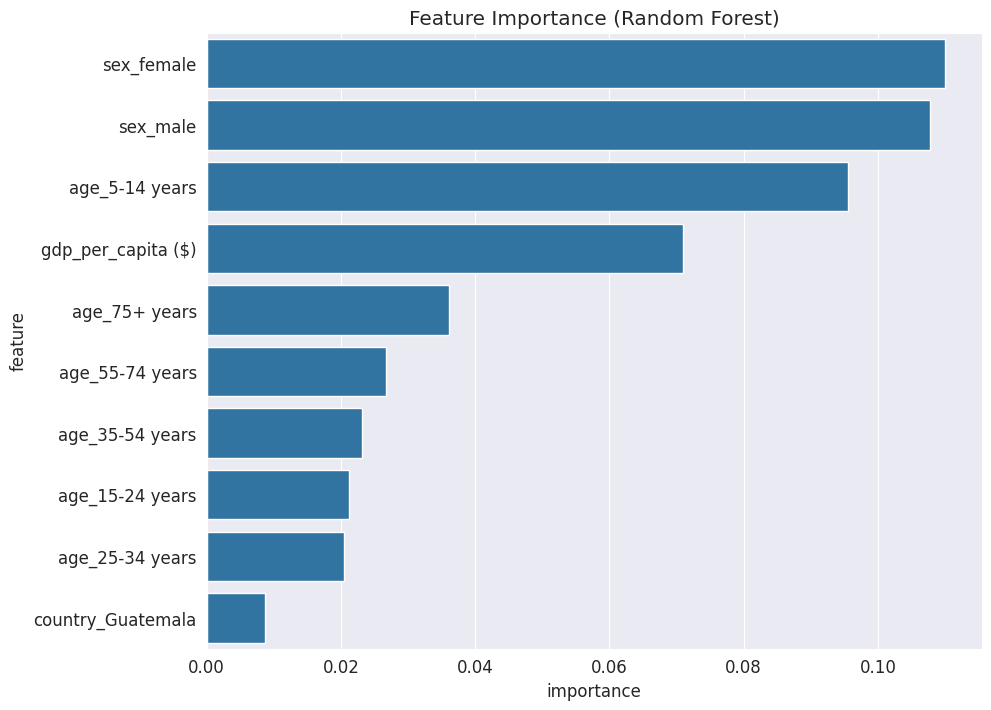

In [592]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Visualize the feature importance
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance (Random Forest)');

<h5>Showing which features get more importance for this model training</h5>

In [593]:
len(rf.estimators_)

100

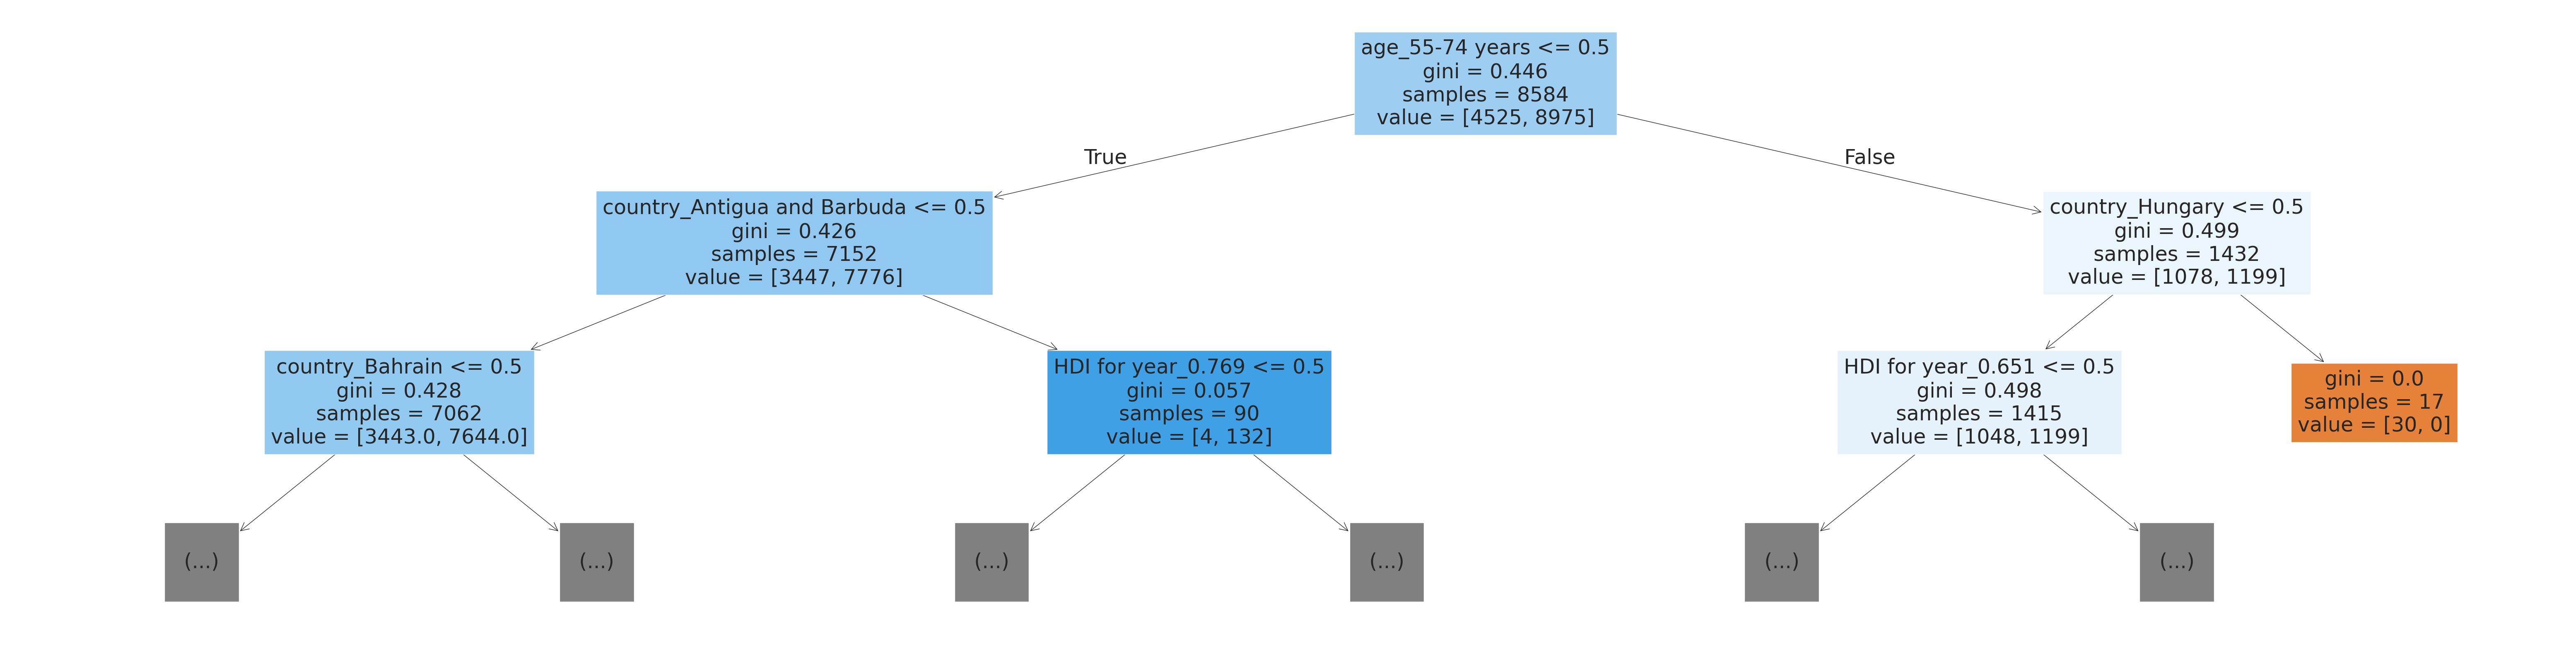

In [594]:
plt.figure(figsize=(80, 20))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, max_depth=2, filled=True);

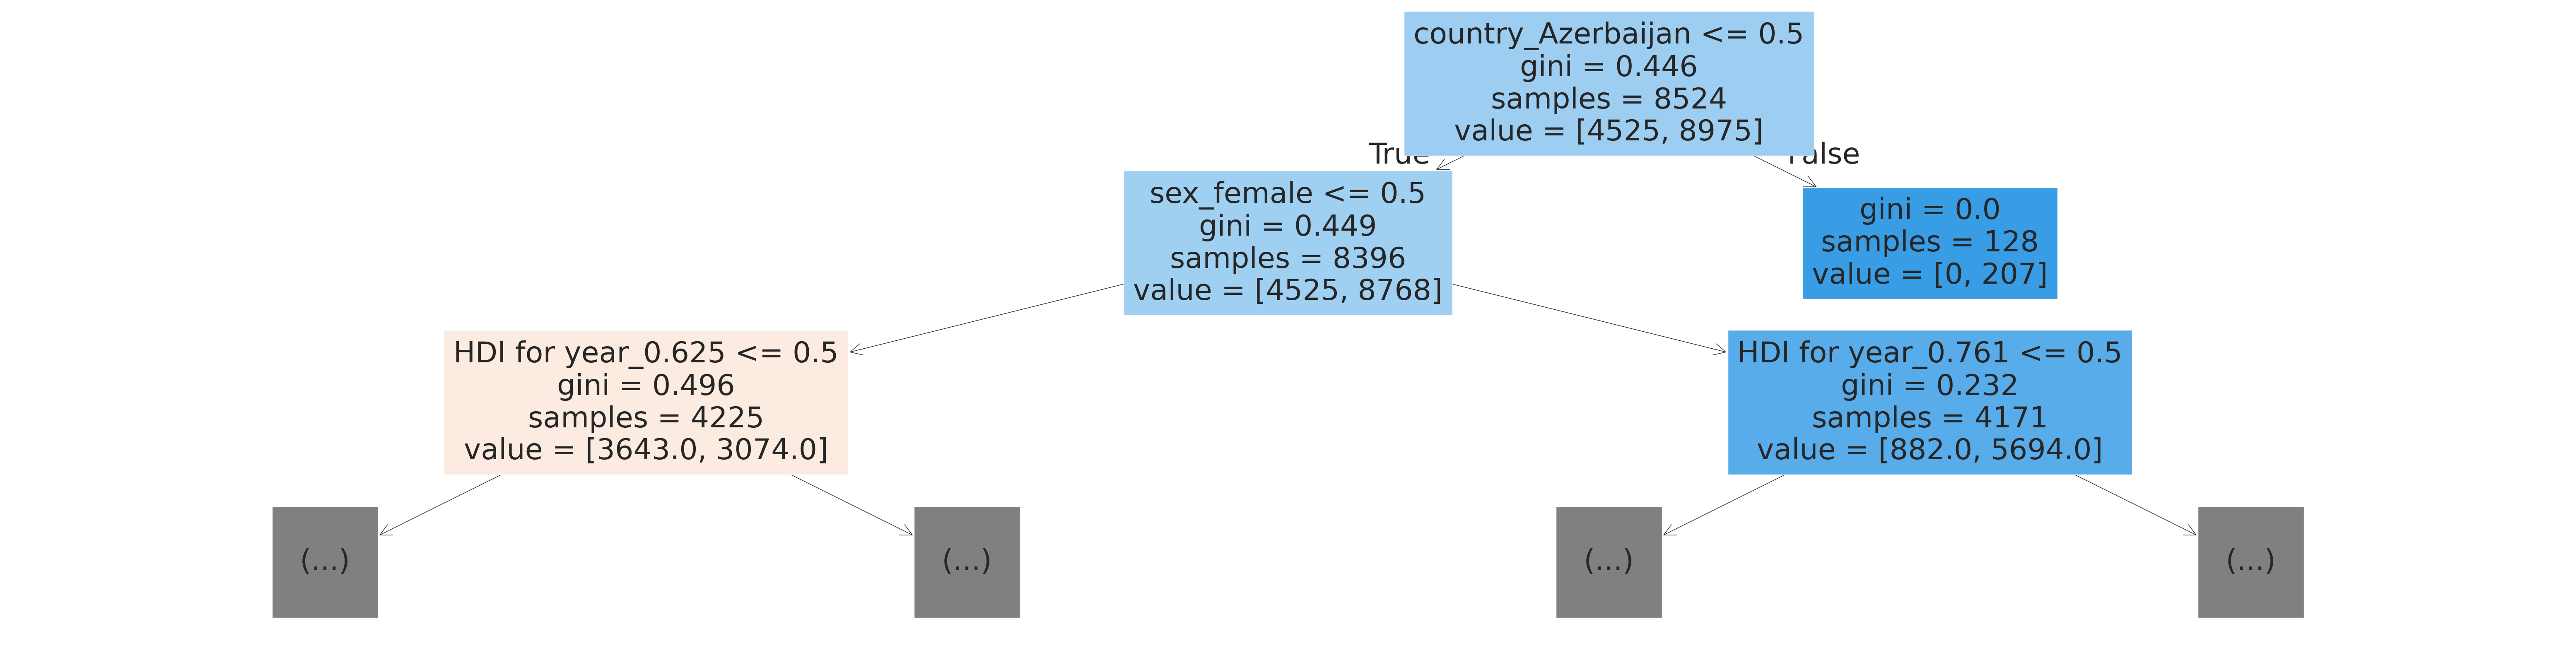

In [595]:
plt.figure(figsize=(80, 20))
plot_tree(rf.estimators_[1], feature_names=X_train.columns, max_depth=2, filled=True);

In [596]:
def train_and_evaluate(X_train, train_target, X_val, val_target, **params):
    rf = RandomForestClassifier(n_jobs=-1, random_state=1, **params)
    rf.fit(X_train, train_target)
    train_pred = rf.predict(X_train)
    val_pred = rf.predict(X_val)
    train_error = 1 - accuracy_score(train_target, train_pred)
    val_error = 1 - accuracy_score(val_target, val_pred)
    return {'model': rf, **params, 'train_error': train_error, 'val_error': val_error}

In [597]:
errors_list = []

for n_estimators in [10, 100, 500]:
    for max_features in ['sqrt', 'log2']:
        outcome = train_and_evaluate(X_train, train_target, X_val, val_target, n_estimators=n_estimators, max_features=max_features)
        errors_list.append(outcome)

In [598]:
errors_df = pd.DataFrame(errors_list).sort_values(by='val_error')
errors_df

model  n_estimators  \
5  (DecisionTreeClassifier(max_features='log2', r...           500   
3  (DecisionTreeClassifier(max_features='log2', r...           100   
4  (DecisionTreeClassifier(max_features='sqrt', r...           500   
2  (DecisionTreeClassifier(max_features='sqrt', r...           100   
0  (DecisionTreeClassifier(max_features='sqrt', r...            10   
1  (DecisionTreeClassifier(max_features='log2', r...            10   

  max_features  train_error  val_error  
5         log2     0.000000   0.099804  
3         log2     0.000000   0.100620  
4         sqrt     0.000000   0.101109  
2         sqrt     0.000000   0.103718  
0         sqrt     0.004148   0.107143  
1         log2     0.003259   0.120841

<h5>value of different tree's error in random forest</h5>

In [599]:
selected_rf = errors_df.iloc[5]['model']

In [600]:
test_pred = selected_rf.predict(X_test)
accuracy_score(test_target, test_pred)

0.8641740599915505

In [601]:
suicide_risk_rf = {
    'model': selected_rf,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}



In [602]:
import joblib

joblib.dump(suicide_risk_rf, 'suicide_risk_rf.joblib')


['suicide_risk_rf.joblib']

In [603]:
suicide_risk_rf_clf = joblib.load('suicide_risk_rf.joblib')

In [604]:
dt_probs = suicide_risk_dt_clf['model'].predict_proba(X_test)
rf_probs = suicide_risk_rf_clf['model'].predict_proba(X_test)

# Keep probabilities for positive outcome only
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]


In [605]:
from sklearn.metrics import roc_curve, roc_auc_score

# The probability estimates correspond to the probability of the class with the greater label,
# i.e. estimator.classes_[1] -> 'low' suicide risk
dt_auc = roc_auc_score(test_target, dt_probs)
rf_auc = roc_auc_score(test_target, rf_probs)

print('Decision Tree (AUROC): {:.3f}'.format(dt_auc))
print('Random Forest (AUROC): {:.3f}'.format(rf_auc))

Decision Tree (AUROC): 0.941
Random Forest (AUROC): 0.932


# Compare Decision Tree and Random Forest Model Using AUC-ROC Curve

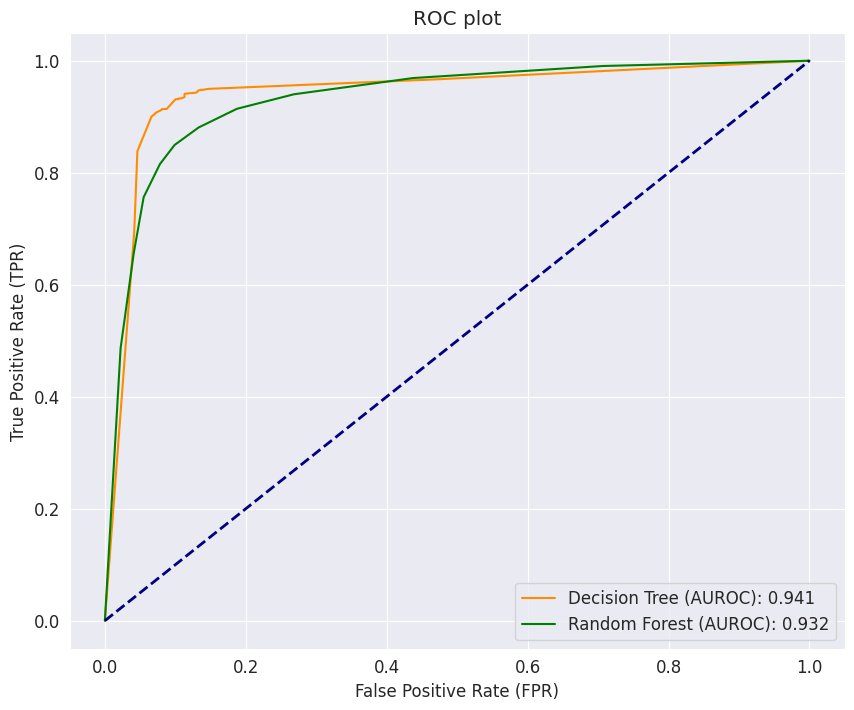

In [606]:
# Compute ROC curves for both models
dt_fpr, dt_tpr, dt_t = roc_curve(test_target, dt_probs, pos_label='low')
rf_fpr, rf_tpr, rf_t = roc_curve(test_target, rf_probs, pos_label='low')

# Plot ROC curves
plt.plot(dt_fpr, dt_tpr, color='darkorange', label='Decision Tree (AUROC): {:.3f}'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, color='green', label='Random Forest (AUROC): {:.3f}'.format(rf_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC plot')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show();

<h5>Regression model start</h5>

In [607]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [608]:
data = pd.read_csv("/content/main_suicides.csv")
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1992    male  35-54 years           12      343800   
1  Albania  1992    male  15-24 years            9      263700   
2  Albania  1992    male  55-74 years            5      159500   
3  Albania  1992    male  25-34 years            7      245500   
4  Albania  1992  female  15-24 years            7      292400   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               3.49  Albania1992         0.614        709,452,584   
1               3.41  Albania1992         0.614        709,452,584   
2               3.13  Albania1992         0.614        709,452,584   
3               2.85  Albania1992         0.614        709,452,584   
4               2.39  Albania1992         0.614        709,452,584   

   gdp_per_capita ($)    generation  
0                 251       Boomers  
1                 251  Generation X  
2                 251        Silent  
3                 251       Boomers  
4                 251  Generation X

In [609]:
data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [610]:
data.head()

country  year  gender    age_group  suicide_count  population  \
0  Albania  1992    male  35-54 years             12      343800   
1  Albania  1992    male  15-24 years              9      263700   
2  Albania  1992    male  55-74 years              5      159500   
3  Albania  1992    male  25-34 years              7      245500   
4  Albania  1992  female  15-24 years              7      292400   

   suicide_rate country-year  HDI for year gdp_for_year  gdp_per_capita  \
0          3.49  Albania1992         0.614  709,452,584             251   
1          3.41  Albania1992         0.614  709,452,584             251   
2          3.13  Albania1992         0.614  709,452,584             251   
3          2.85  Albania1992         0.614  709,452,584             251   
4          2.39  Albania1992         0.614  709,452,584             251   

     generation  
0       Boomers  
1  Generation X  
2        Silent  
3       Boomers  
4  Generation X

In [611]:
data.age_group.value_counts()

age_group
35-54 years    4066
15-24 years    4066
55-74 years    4066
25-34 years    4066
75+ years      4066
5-14 years     4036
Name: count, dtype: int64

In [612]:
data.generation.value_counts()

generation
Silent             5764
Millenials         5746
Generation X       5308
Boomers            4398
G.I. Generation    1698
Generation Z       1452
Name: count, dtype: int64

In [613]:
country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 97


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation',
       'Saint Kitts and Nevis', 'S

In [614]:
data.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_count     0
population        0
suicide_rate      0
country-year      0
HDI for year      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

In [615]:
data = data.drop(['country-year'], axis = 1)
data.shape

(24366, 11)

In [616]:
data = data.dropna()
data.shape

(24366, 11)

In [617]:
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

<h5>categorical column preprocessed done</h5>

In [618]:
stat_data = data.copy()
stat_data

country  year  gender  age_group  suicide_count  population  \
0            0     2       1          2             12      343800   
1            0     2       1          0              9      263700   
2            0     2       1          4              5      159500   
3            0     2       1          1              7      245500   
4            0     2       0          0              7      292400   
...        ...   ...     ...        ...            ...         ...   
24361       96    24       0          2            107     3620833   
24362       96    24       0          5              9      348465   
24363       96    24       1          3             60     2762158   
24364       96    24       0          3             44     2631600   
24365       96    24       0          4             21     1438935   

       suicide_rate  HDI for year    gdp_for_year  gdp_per_capita  generation  
0              3.49         0.614     709,452,584             251           0  
1              3.41         0.614     709,452,584             251           2  
2              3.13         0.614     709,452,584             251           5  
3              2.85         0.614     709,452,584             251           0  
4              2.39         0.614     709,452,584             251           2  
...             ...           ...             ...             ...         ...  
24361          2.96         0.624  63,067,077,179            2309           2  
24362          2.58         0.624  63,067,077,179            2309           5  
24363          2.17         0.624  63,067,077,179            2309           3  
24364          1.67         0.624  63,067,077,179            2309           3  
24365          1.46         0.624  63,067,077,179            2309           0  

[24366 rows x 11 columns]

In [619]:
data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
HDI for year      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [620]:
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [621]:

numerical = ['suicide_count', 'population', 'suicide_rate',
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

<h5>numerical column preprocessed with robust_scalar</h5>

In [622]:
data

country  year  gender  age_group  suicide_count  population  \
0            0     2       1          2      -0.105263   -0.080510   
1            0     2       1          0      -0.127820   -0.136720   
2            0     2       1          4      -0.157895   -0.209841   
3            0     2       1          1      -0.142857   -0.149491   
4            0     2       0          0      -0.142857   -0.116580   
...        ...   ...     ...        ...            ...         ...   
24361       96    24       0          2       0.609023    2.219120   
24362       96    24       0          5      -0.127820   -0.077236   
24363       96    24       1          3       0.255639    1.616552   
24364       96    24       0          3       0.135338    1.524934   
24365       96    24       0          4      -0.037594    0.687992   

       suicide_rate  HDI for year  gdp_for_year  gdp_per_capita  generation  
0         -0.160612         0.614     -0.186386       -0.430146           0  
1         -0.165711         0.614     -0.186386       -0.430146           2  
2         -0.183556         0.614     -0.186386       -0.430146           5  
3         -0.201402         0.614     -0.186386       -0.430146           0  
4         -0.230720         0.614     -0.186386       -0.430146           2  
...             ...           ...           ...             ...         ...  
24361     -0.194391         0.624      0.043514       -0.340492           2  
24362     -0.218611         0.624      0.043514       -0.340492           5  
24363     -0.244742         0.624      0.043514       -0.340492           3  
24364     -0.276609         0.624      0.043514       -0.340492           3  
24365     -0.289994         0.624      0.043514       -0.340492           0  

[24366 rows x 11 columns]

In [623]:
# Sepratating & assigning features and target columns to X & y

y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape

((24366, 10), (24366,))

In [624]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((19492, 10), (4874, 10))

<h5>from the above two cells x(independent features) and y(dependent features) selection and data is splitting into train and test part</h5>

In [625]:
print(X_train)

       country  year  gender  age_group  suicide_count  population  \
17523       68    17       1          1      -0.097744   -0.139562   
22303       88     5       1          1       0.120301   -0.250958   
12801       48    17       0          1      -0.142857   -0.110303   
8625        33    20       0          2      -0.157895    0.141381   
19383       76    22       0          4       0.766917    0.359606   
...        ...   ...     ...        ...            ...         ...   
3714        15     2       1          3       0.097744   12.428709   
7409        28    23       1          4       0.248120   -0.108161   
19709       78     8       0          1      -0.015038   -0.117281   
5787        23     2       1          0       1.037594    0.439972   
14155       54     0       1          0      -0.180451   -0.303804   

       HDI for year  gdp_for_year  gdp_per_capita  generation  
17523         0.834      0.104881        2.671967           2  
22303         0.678     -0.1693

In [626]:
#importing required libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [627]:
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

KNNR

In [628]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [629]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 2, 'weights': 'distance'}


In [630]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

In [631]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train)
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.780

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.6031999099911188


In [632]:
#storing the results.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

LR

In [633]:
# Linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [634]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [635]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.313
Linear Regression: Accuracy on test Data: 0.306

Linear Regression: The RMSE of the training set is: 1.001734642622005
Linear Regression: The RMSE of the testing set is: 1.0718817695946816


In [636]:
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Not good Performance

DTR

In [637]:
# Decision Tree regression model
from sklearn.tree import DecisionTreeRegressor

# instantiate the model
tree = DecisionTreeRegressor(max_depth=9)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [638]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [639]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.970
Decision Tree: Accuracy on test Data: 0.948

Decision Tree: The RMSE of the training set is: 0.20860568823036318
Decision Tree: The RMSE of the testing set is: 0.294597682387215


In [640]:
#storing the results.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

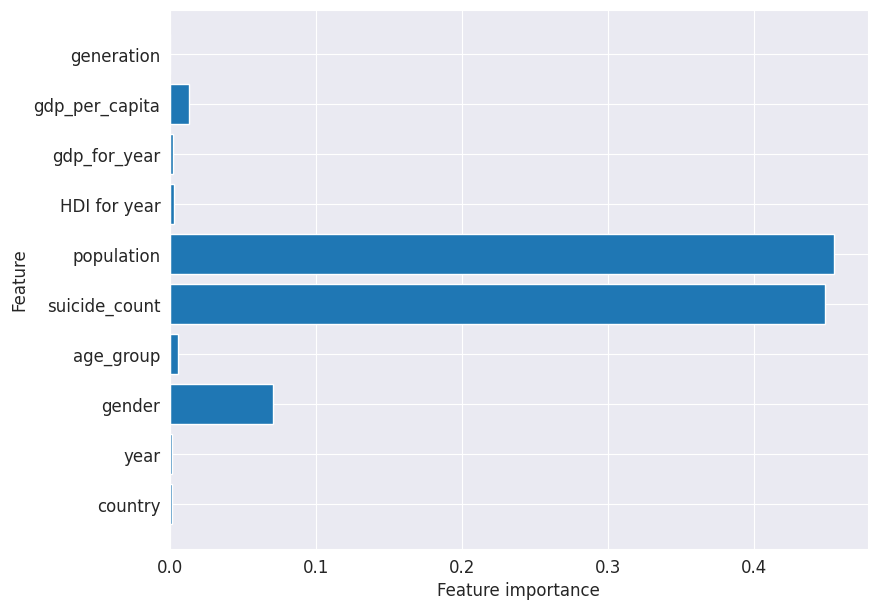

In [641]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

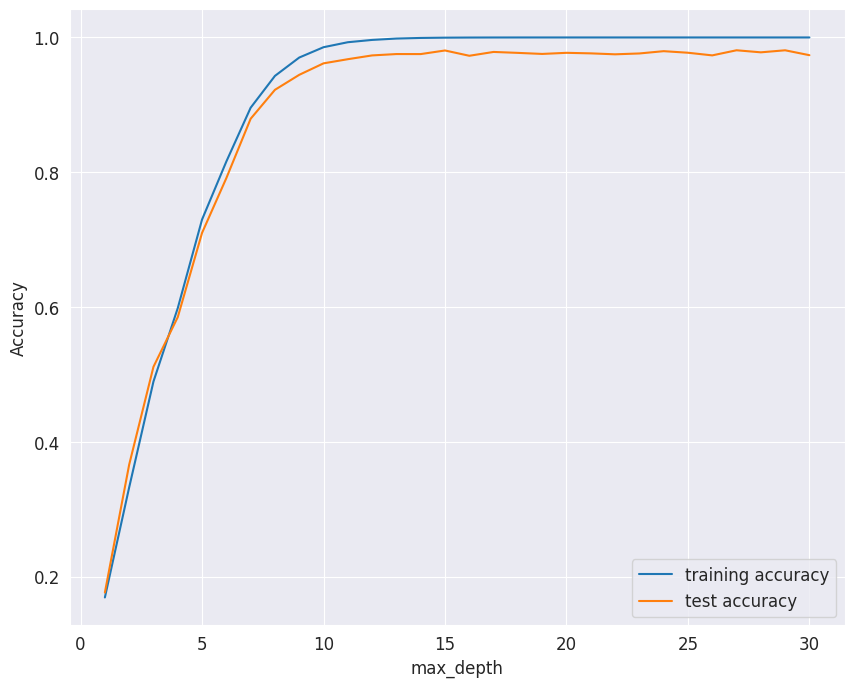

In [642]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

RfR

In [643]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=9)

# fit the model
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [644]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [645]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.986
Random Forest: Accuracy on test Data: 0.973

Random Forest: The RMSE of the training set is:  0.14395030617234317
Random Forest: The RMSE of the testing set is:  0.2102202889131932


In [646]:
#storing the results.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

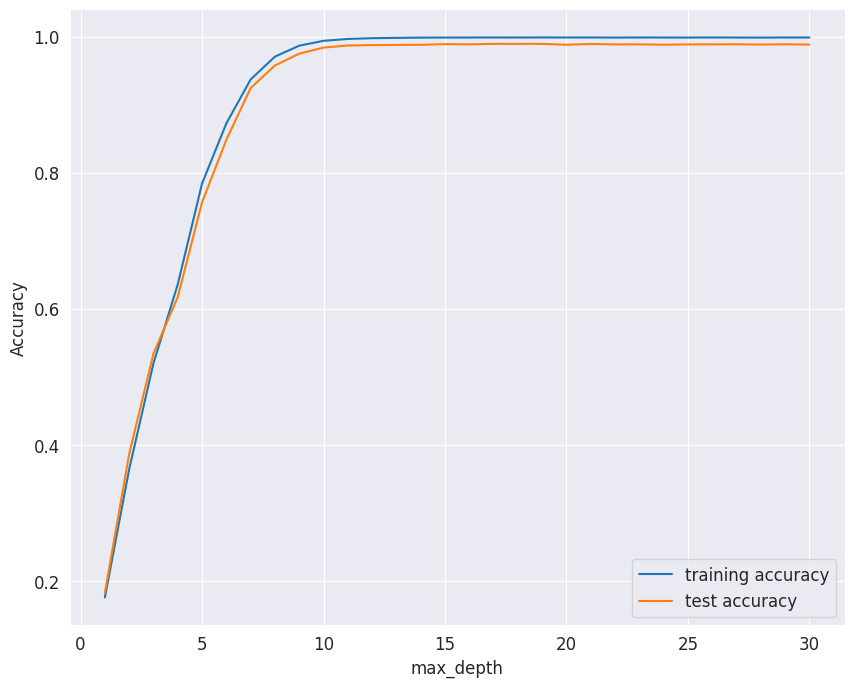

In [647]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    forest = RandomForestRegressor(max_depth=n)
    forest.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Deep Learning

In [648]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [649]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [650]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.919
Multilayer Perceptron Regression: Accuracy on test Data: 0.901

Multilayer Perceptron Regression: The RMSE of the training set is:  0.3439217563937978
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.4040232275198315


In [651]:
#storing the results.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

In [652]:

%pip install xgboost

#XGBoost Regression model
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [653]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [654]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.992
XGBoost Regression: Accuracy on test Data: 0.986

XGBoost Regression: The RMSE of the training set is:  0.10586834936972506
XGBoost Regression: The RMSE of the testing set is:  0.15091803897796627


In [655]:
#storing the results.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

<h5>Hybrid Model</h5>

In [656]:
%pip install mlxtend


In [657]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

In [658]:
#combined the two models that is Multiple linear perceptron and random forest
regressor_new= [mlp,forest]
svr_rbf = SVR(kernel='rbf')
#meta regressor model is Support vector Regressor
stregressor= StackingRegressor(regressors= regressor_new, meta_regressor= svr_rbf)
stregressor.fit(X_train, y_train)

StackingRegressor(meta_regressor=SVR(),
                  regressors=[MLPRegressor(hidden_layer_sizes=[100, 100]),
                              RandomForestRegressor(max_depth=30)])

In [659]:
#predicting the target value from the model for the samples
y_test_stregressor = stregressor.predict(X_test)
y_train_stregressor = stregressor.predict(X_train)

In [660]:
#computing the accuracy of the model performance
acc_train_stregressor = stregressor.score(X_train, y_train)
acc_test_stregressor = stregressor.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_stregressor = np.sqrt(mean_squared_error(y_train, y_train_stregressor))
rmse_test_stregressor = np.sqrt(mean_squared_error(y_test, y_test_stregressor))

print("Stacking Regression: Accuracy on training Data: {:.3f}".format(acc_train_stregressor))
print("Stacking Regression: Accuracy on test Data: {:.3f}".format(acc_test_stregressor))
print('\nStacking Regression: The RMSE of the training set is: ', rmse_train_stregressor)
print('Stacking Regression: The RMSE of the testing set is: ', rmse_test_stregressor)

Stacking Regression: Accuracy on training Data: 0.996
Stacking Regression: Accuracy on test Data: 0.985

Stacking Regression: The RMSE of the training set is:  0.0801042346851861
Stacking Regression: The RMSE of the testing set is:  0.1593774328168687


In [661]:
#storing the results.
#Caution: Execute only once to avoid duplications.
storeResults('Stacking Regression',acc_train_stregressor, acc_test_stregressor, rmse_train_stregressor, rmse_test_stregressor)

In [662]:
%pip install mlens

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 4.3 MB/s eta 0:00:00


In [663]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [664]:
results

ML Model  Train Accuracy  Test Accuracy  \
0    k-Nearest Neighbors Regression           1.000          0.780   
1                 Linear Regression           0.313          0.306   
2                     Decision Tree           0.970          0.948   
3                     Random Forest           0.986          0.973   
4  Multilayer Perceptron Regression           0.919          0.901   
5                XGBoost Regression           0.992          0.986   
6               Stacking Regression           0.996          0.985   

   Train RMSE  Test RMSE  
0       0.000      0.603  
1       1.002      1.072  
2       0.209      0.295  
3       0.144      0.210  
4       0.344      0.404  
5       0.106      0.151  
6       0.080      0.159

In [665]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model  Train Accuracy  Test Accuracy  \
5                XGBoost Regression           0.992          0.986   
6               Stacking Regression           0.996          0.985   
3                     Random Forest           0.986          0.973   
2                     Decision Tree           0.970          0.948   
4  Multilayer Perceptron Regression           0.919          0.901   
0    k-Nearest Neighbors Regression           1.000          0.780   
1                 Linear Regression           0.313          0.306   

   Train RMSE  Test RMSE  
5       0.106      0.151  
6       0.080      0.159  
3       0.144      0.210  
2       0.209      0.295  
4       0.344      0.404  
0       0.000      0.603  
1       1.002      1.072